![ieseg logo](./img/ieseg.png)

#### MBD 2021-2022
# Statistical & Machine Learning Approaches for Marketing

## Section 6: Unsupervised Learning

### 1. Import all required libraries and datasets

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(mlr)         # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.



### 2. Principal Components Analysis

**Example 2:** US Crime Rates: This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

Source: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html

In [2]:
# Explore USArrests data
# Murder : Murder arrests (per 100,000)
# Assault : Assault arrests (per 100,000)
# UrbanPop : Percent urban population
# Rape : Rape arrests (per 100,000)
crime <- USArrests
str(crime)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


In [3]:
# Show the data
head(crime)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [4]:
# 50 states
row.names(crime)

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [5]:
# Check the variables means
print(apply(crime, 2, mean))

  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 


In [6]:
# Check the variables variance
print(apply(crime, 2, var))

    Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916 


In [7]:
# Run PCA with variables scaled to sd = 1
pca_out <- prcomp(crime, center=T, scale=T)

In [8]:
# Mean and sd of variables (used to scale)
print(pca_out$center)  # Mean of the original variables
print(pca_out$scale)  # Std of the original variables

  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 
   Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385 


In [9]:
# The rotation matrix, principal component loading vectors
pca_out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [10]:
# Summary the principal component loading vectors
summary(pca_out)$importance

,PC1,PC2,PC3,PC4
Standard deviation,1.574878,0.9948694,0.5971291,0.4164494
Proportion of Variance,0.620060,0.2474400,0.0891400,0.0433600
Cumulative Proportion,0.620060,0.8675000,0.9566400,1.0000000


In [11]:
# The principal component score vectors
dim(pca_out$x)  # Same size (n x p) with the original data
head(pca_out$x)  # Rotated data in a new coordinate/space 

[1] 50  4

,PC1,PC2,PC3,PC4
Alabama,-0.9756604,1.1220012,-0.43980366,0.154696581
Alaska,-1.9305379,1.0624269,2.01950027,-0.434175454
Arizona,-1.7454429,-0.7384595,0.05423025,-0.826264240
Arkansas,0.1399989,1.1085423,0.11342217,-0.180973554
California,-2.4986128,-1.5274267,0.59254100,-0.338559240
Colorado,-1.4993407,-0.9776297,1.08400162,0.001450164


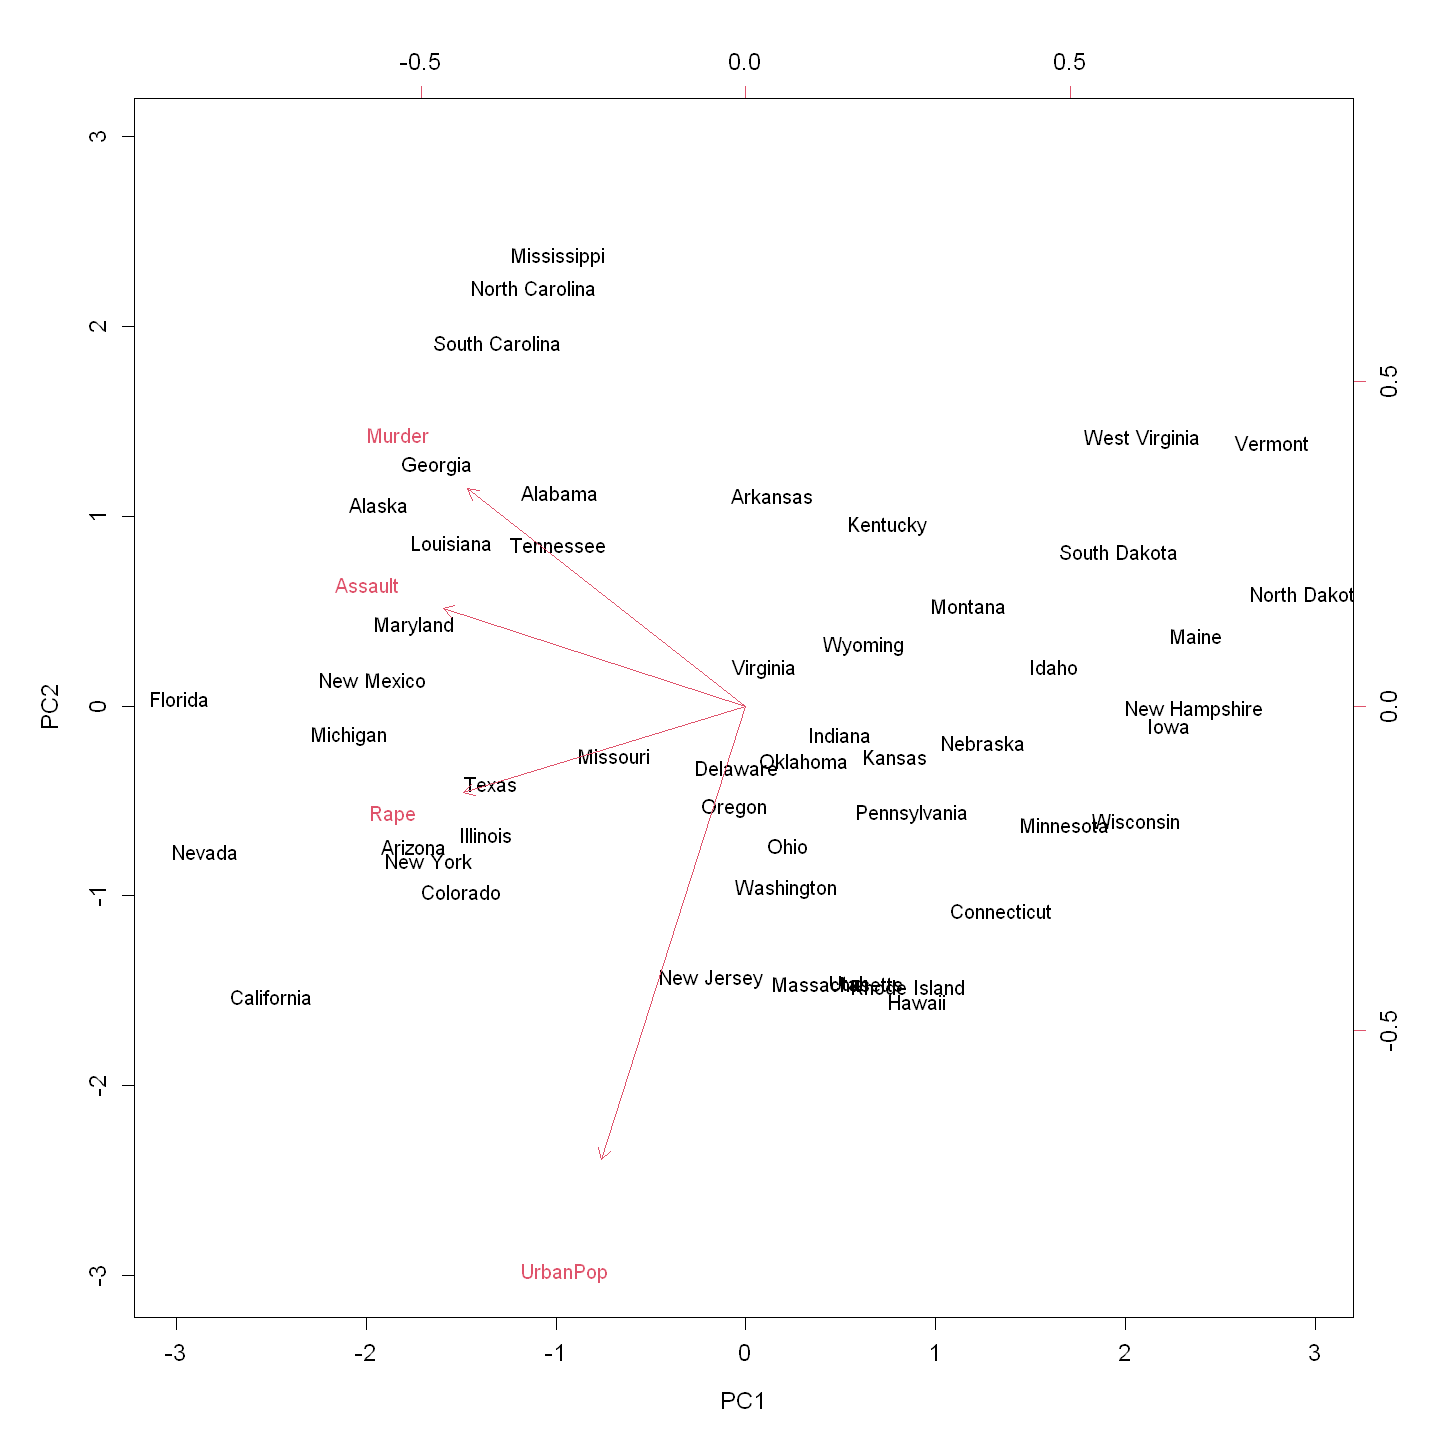

In [12]:
# Plot the first two principal components: biplot
options(repr.plot.width=12, repr.plot.height=12)
par(cex.lab=1.2, cex.axis=1.2, cex.main=1.2, cex.sub=1.2)
biplot(pca_out, scale=0, cex=1)  # Biplot

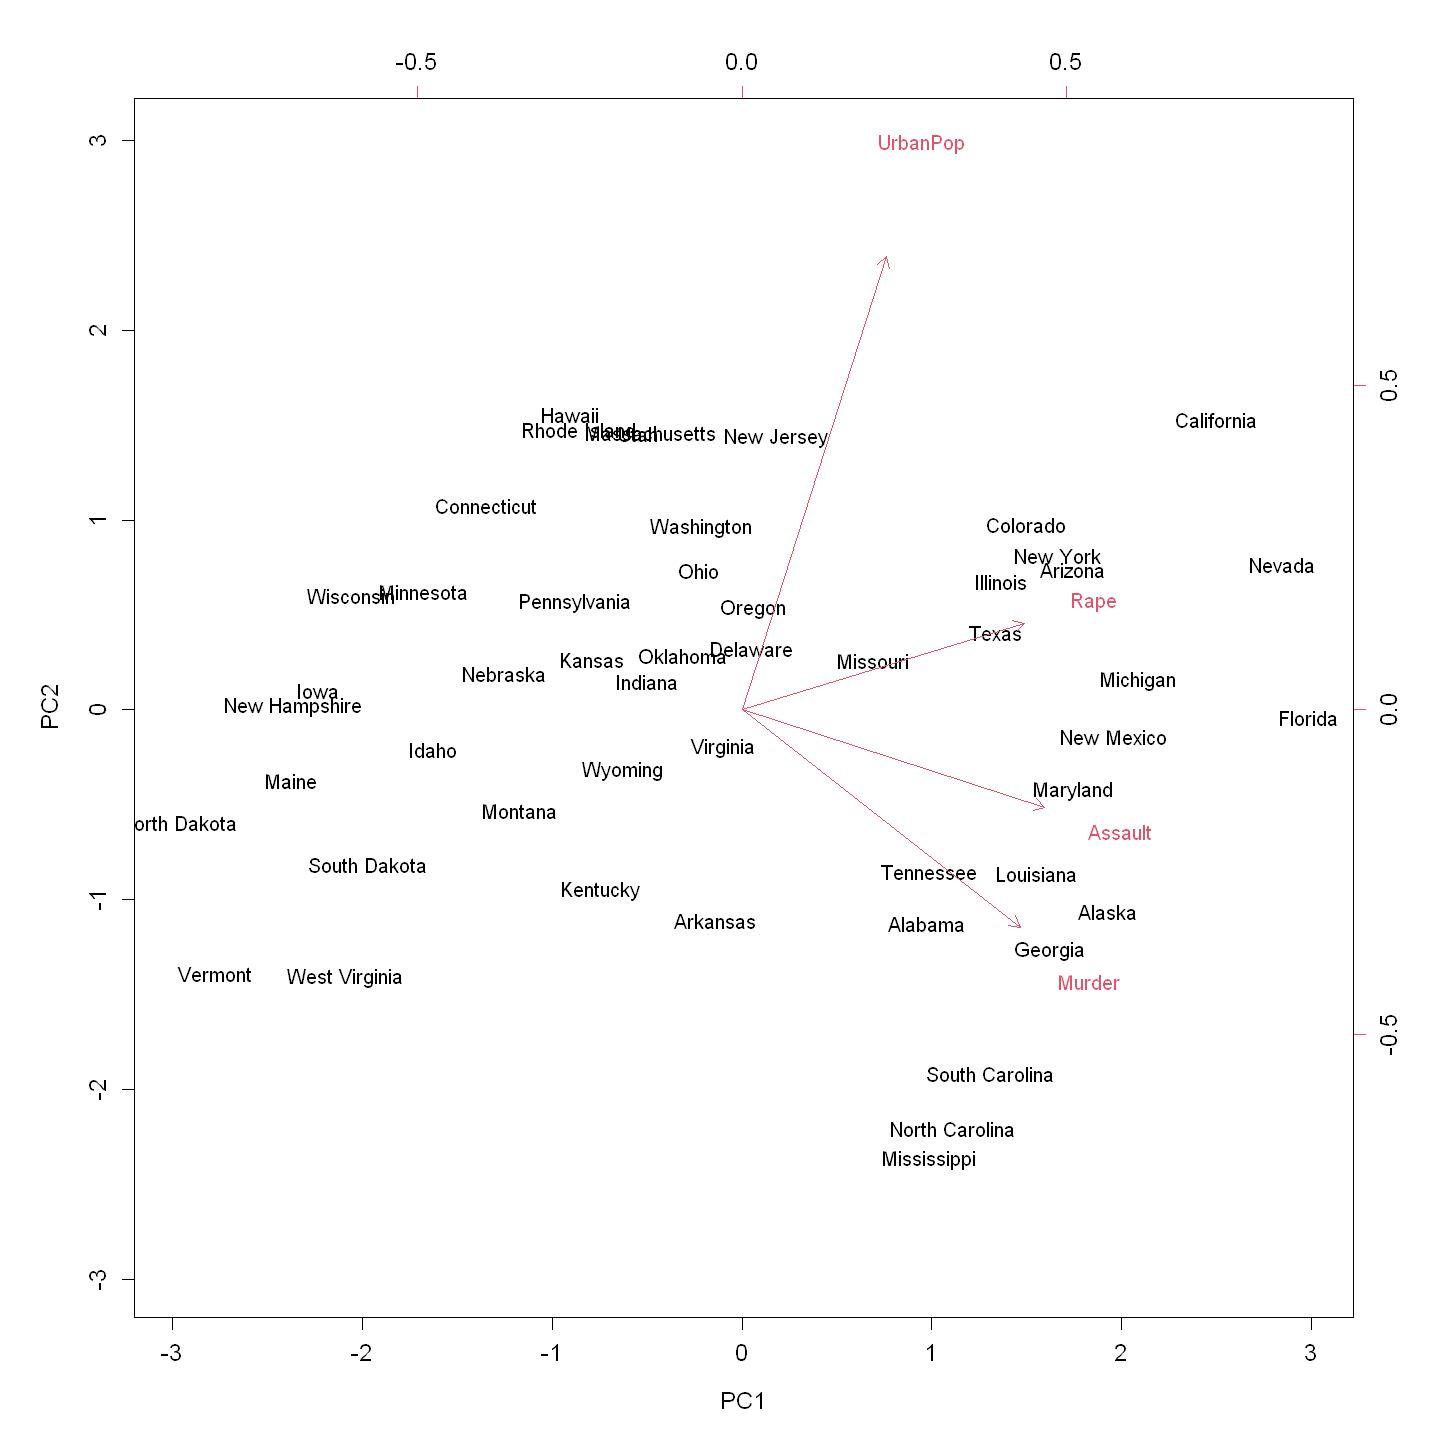

In [13]:
# Rotate the biplot
pca_out$rotation <- -pca_out$rotation
pca_out$x <- -pca_out$x

options(repr.plot.width=12, repr.plot.height=12)
par(cex.lab=1.2, cex.axis=1.2, cex.main=1.2, cex.sub=1.2)
biplot(pca_out, scale=0, cex=1)

In [14]:
# The standard deviation of the rotated data
pca_out$sdev  # pca_out$x

[1] 1.5748783 0.9948694 0.5971291 0.4164494

In [15]:
# Variance explained by each principal component
pca_var <- pca_out$sdev ^ 2
pca_var

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [16]:
# Proportion of variance explained (PVE) by each principal component
pve <- pca_var / sum(pca_var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

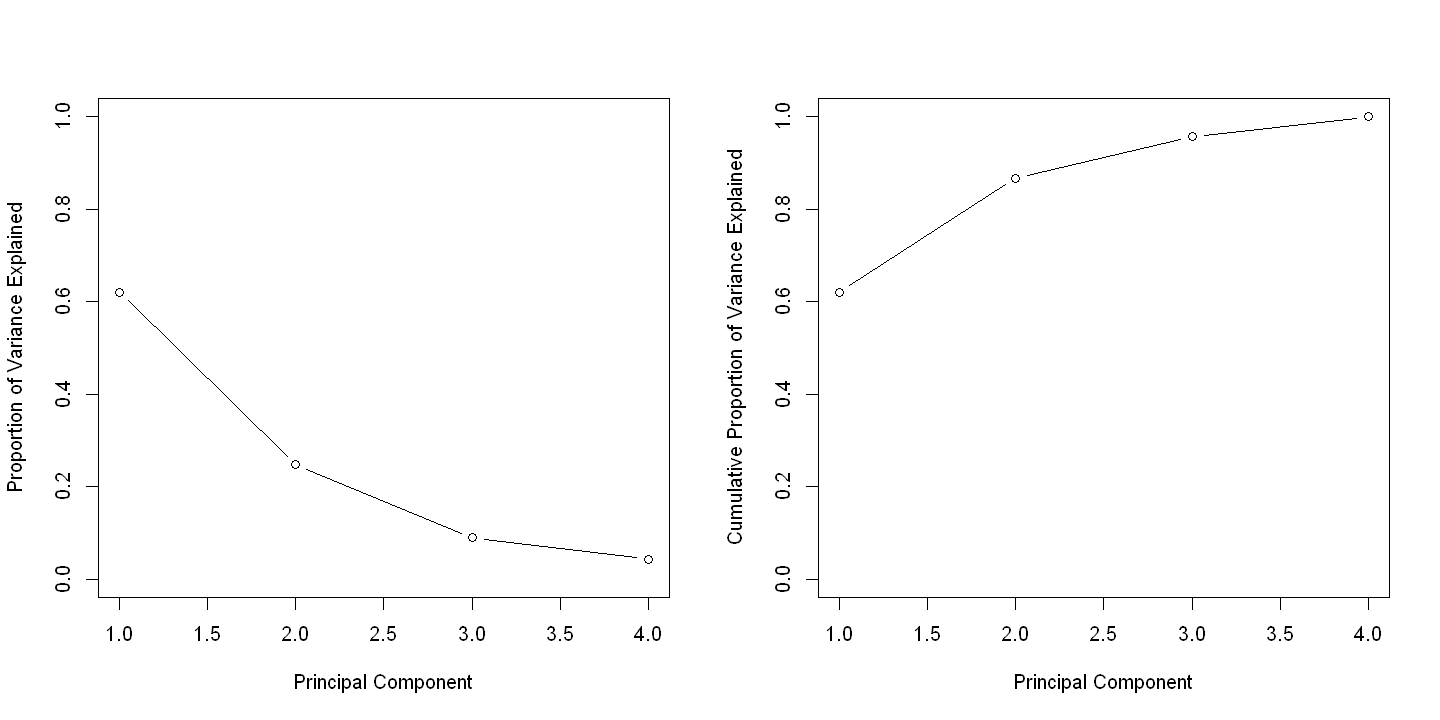

In [17]:
# Plot the PVE
options(repr.plot.width=12, repr.plot.height=6)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
par(mfrow=c(1, 2))
plot(pve, xlab='Principal Component', ylab='Proportion of Variance Explained',
     ylim=c(0, 1), type='b')
plot(cumsum(pve), xlab='Principal Component', ylab='Cumulative Proportion of Variance Explained',
     ylim=c(0, 1), type='b')

### 3. Clustering

#### 3.1. K-Means clustering

**Example 5:** Simulated data, 50 observations, 2 dimensions.

In [18]:
# Create sample data
set.seed(2)
x <- matrix(rnorm(50 * 2), ncol=2)

# Move a group of data to the bottom-right
x[1:25, 1] <- x[1:25, 1] + 3
x[1:25, 2] <- x[1:25, 2] - 4

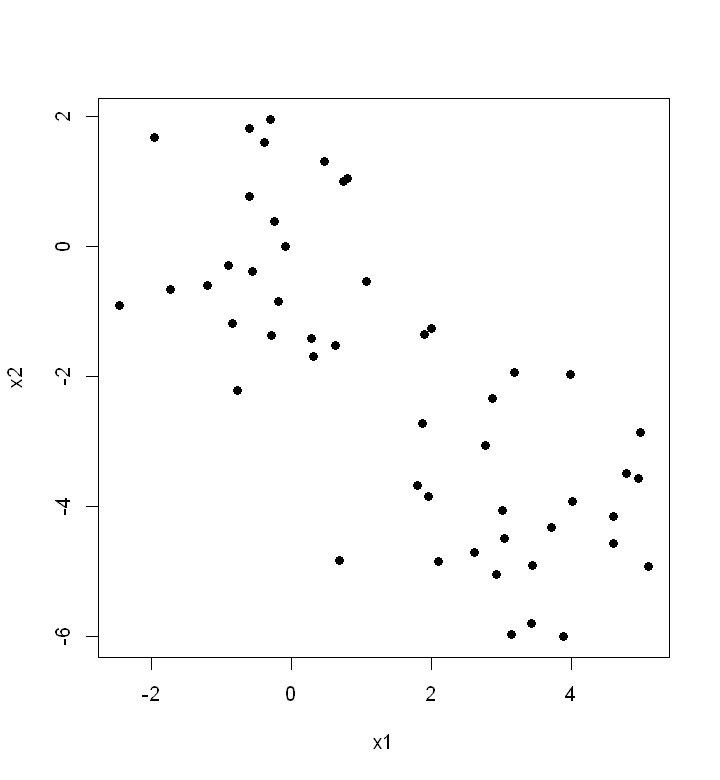

In [19]:
# Plot the data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x, pch=19, xlab='x1', ylab='x2')

In [20]:
# Perform K-Means clustering with K=2
km_out <- kmeans(x, 2, nstart=20)
km_out

K-means clustering with 2 clusters of sizes 25, 25

Cluster means:
        [,1]       [,2]
1  3.3339737 -4.0761910
2 -0.1956978 -0.1848774

Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 63.20595 65.40068
 (between_SS / total_SS =  72.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [21]:
# Print out the results
table(km_out$cluster)
km_out$cluster


 1  2 
25 25 

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

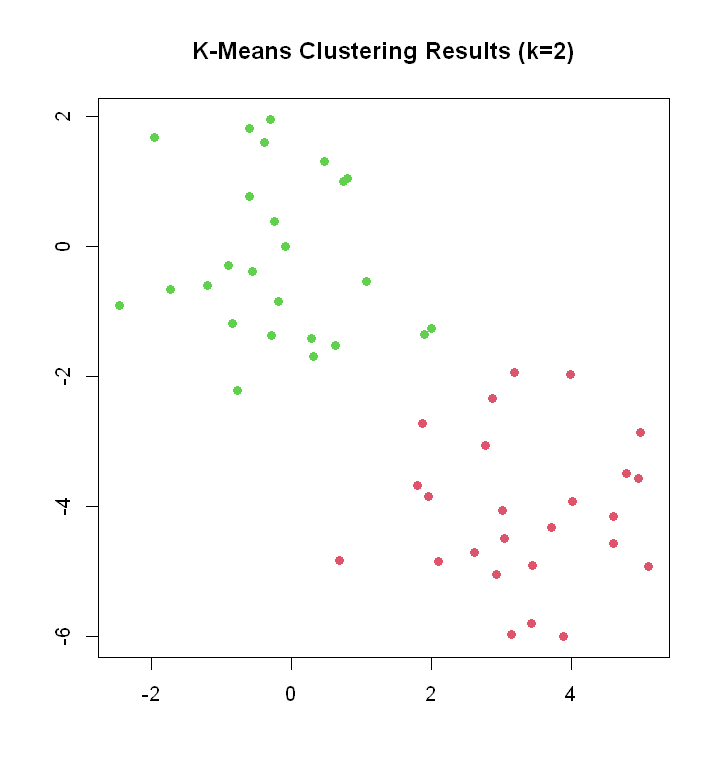

In [22]:
# Plot the clusters
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x, col=(km_out$cluster + 1), main='K-Means Clustering Results (k=2)',
    xlab='', ylab='', pch=19, cex=1)

In [23]:
# Perform K-Means clustering with K=3
set.seed(4)
km_out <- kmeans(x, 3, nstart=20)
km_out

K-means clustering with 3 clusters of sizes 17, 23, 10

Cluster means:
        [,1]        [,2]
1  3.7789567 -4.56200798
2 -0.3820397 -0.08740753
3  2.3001545 -2.69622023

Clustering vector:
 [1] 1 3 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 3 2 3 2 2 2 2

Within cluster sum of squares by cluster:
[1] 25.74089 52.67700 19.56137
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

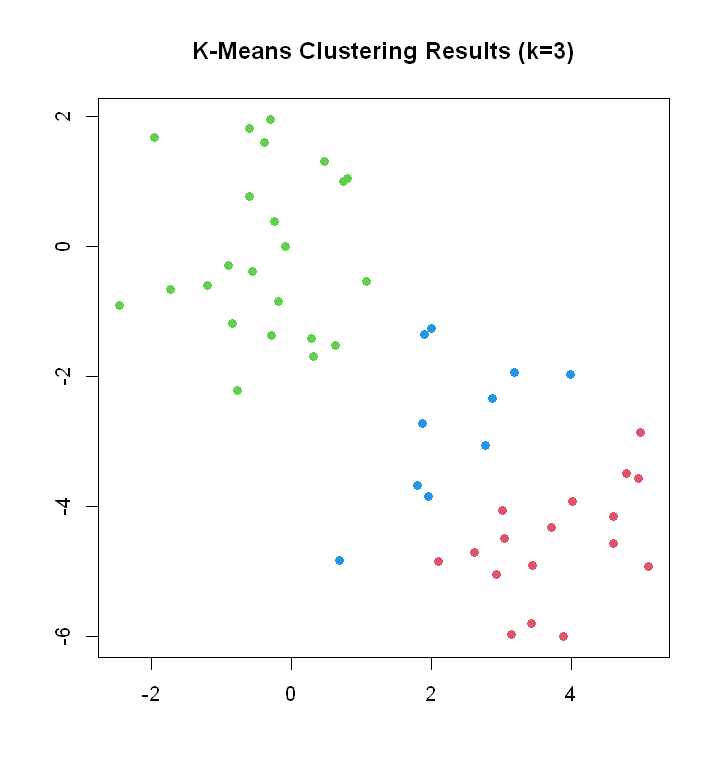

In [24]:
# Plot the clusters
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x, col=(km_out$cluster + 1), main='K-Means Clustering Results (k=3)',
    xlab='', ylab='', pch=19, cex=1)

In [25]:
# Compare total within-cluster sum-of-squares using different nstart
km_out <- kmeans(x, 3, nstart=1)  # Run k-means 1 time
km_out$tot.withinss
km_out <- kmeans(x, 3, nstart=20)  # Run k-means 20 times
km_out$tot.withinss
km_out <- kmeans(x, 3, nstart=50)  # Run k-means 50 times
km_out$tot.withinss

[1] 104.3319

[1] 97.97927

[1] 97.97927

#### 3.2. Hierarchical clustering

**Example 6:** Simulated data, 50 observations, 2 dimensions, 2 groups of data.

In [26]:
# Create sample data
set.seed(2)
x <- matrix(rnorm(50 * 2), ncol=2)

# Move a group of data to the bottom-right
x[1:25, 1] <- x[1:25, 1] + 3
x[1:25, 2] <- x[1:25, 2] - 4

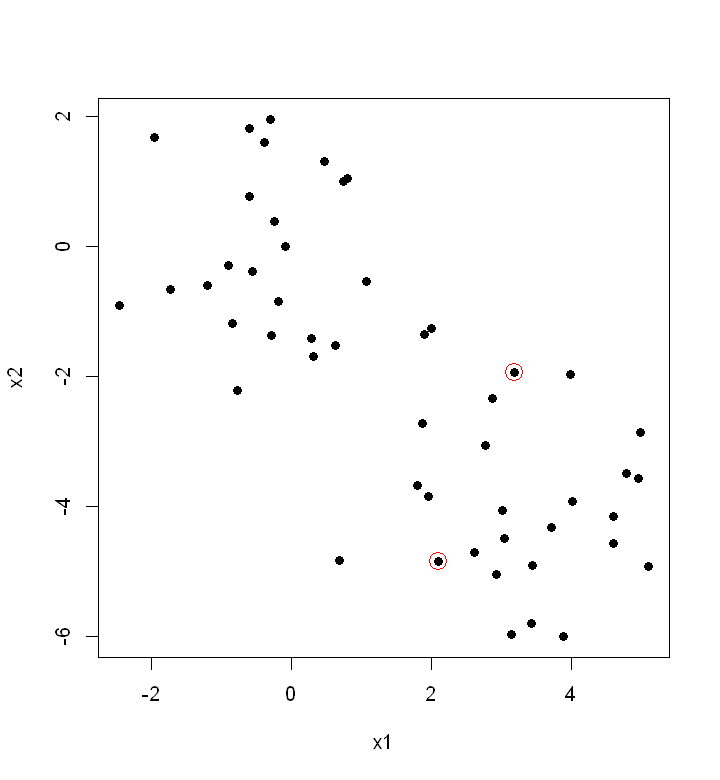

In [27]:
# Plot the data
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x, pch=19, xlab='x1', ylab='x2')

# Two sample points to calculate distance
# Observation: 1st and 2nd
points(x[c(1, 2), ], cex=2, pch=1, col='red')

In [28]:
# Calculate Euclidean distance between all observations
dist_x <- dist(x)
dist_matrix <- as.matrix(dist_x)

# Distance between obs 1 and obs 2
dist_matrix[1, 2]  # Using distance matrix
sqrt(sum((x[1, ] - x[2, ]) ^ 2))  # Manual calculating

# The distance matrix
head(dist_matrix)

[1] 3.099491

[1] 3.099491

,1,2,3,4,5,6,7,8,9,10,⋯,41,42,43,44,45,46,47,48,49,50
1,0.0000000,3.099491,2.500046,2.126855,0.8430531,1.5267586,1.6855729,1.8919674,3.494706,2.6219049,⋯,6.902182,7.681439,4.693451,3.485546,3.640313,3.586936,7.211739,5.319436,4.604008,5.371730
2,3.0994914,0.000000,2.979541,1.534550,3.1251383,4.0325204,2.4458664,1.2075315,2.024379,0.5104064,⋯,5.022302,6.287083,4.095824,1.404506,2.596715,1.374290,5.228605,3.807753,3.541284,4.581676
3,2.5000460,2.979541,0.000000,3.281285,1.7372647,2.0219898,0.9118445,2.3631011,1.747094,2.8233696,⋯,7.917906,9.046690,6.394938,4.179680,5.002392,4.206476,8.153281,6.540188,6.050431,7.012496
4,2.1268548,1.534550,3.281285,0.000000,2.5495937,3.4788768,2.4362384,0.9533136,3.117838,1.0677020,⋯,4.876451,5.836699,3.118493,1.366248,1.738776,1.476171,5.164068,3.362571,2.785447,3.731312
5,0.8430531,3.125138,1.737265,2.549594,0.0000000,0.9426105,1.0706619,1.9898337,3.007523,2.7198214,⋯,7.423438,8.311376,5.392473,3.826518,4.215793,3.906495,7.713571,5.883783,5.226464,6.060756
6,1.5267586,4.032520,2.021990,3.478877,0.9426105,0.0000000,1.7407998,2.9255036,3.615494,3.6475934,⋯,8.343304,9.186987,6.218022,4.768486,5.111828,4.849047,8.638781,6.787667,6.103076,6.894881


**3 types of linkage**

In [29]:
# Implement hierarchical clustering
hc_complete <- hclust(dist_x, method='complete')  # Complete linkage
hc_average <- hclust(dist_x, method='average')  # Average linkage
hc_single <- hclust(dist_x, method='single')  # Single linkage

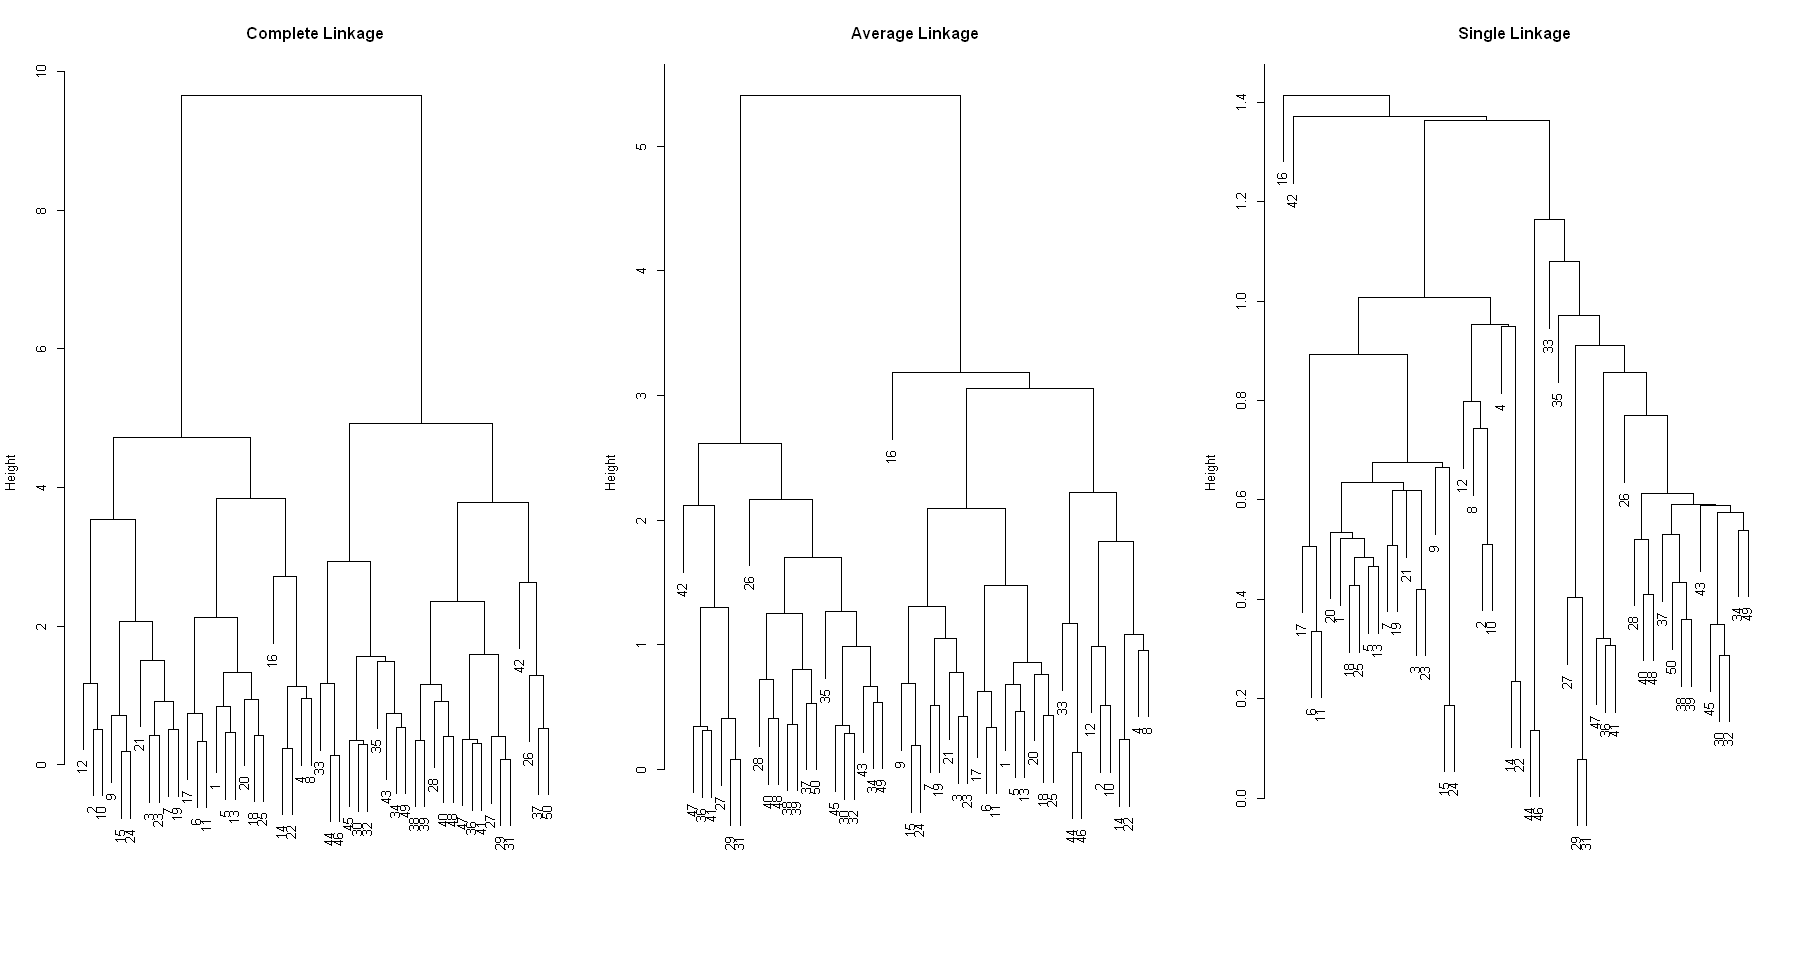

In [30]:
# Plot the dendrograms
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1, 3))

plot(hc_complete, main='Complete Linkage', xlab='', sub='', cex=1)
plot(hc_average, main='Average Linkage', xlab='', sub='', cex=1)
plot(hc_single, main='Single Linkage', xlab='', sub='', cex=1)

In [31]:
# Determine the cluster labels
cutree(hc_complete, k=2)  # Cut the tree by number of groups
cutree(hc_complete, h=6)  # Cut the tree by heigths

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [32]:
# Compare the clusters between three linkage methods
cutree(hc_complete, k=2) 
cutree(hc_average, k=2) 
cutree(hc_single, k=2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

**Scale values before clustering**

[1] -9.66241e-18

[1] 1

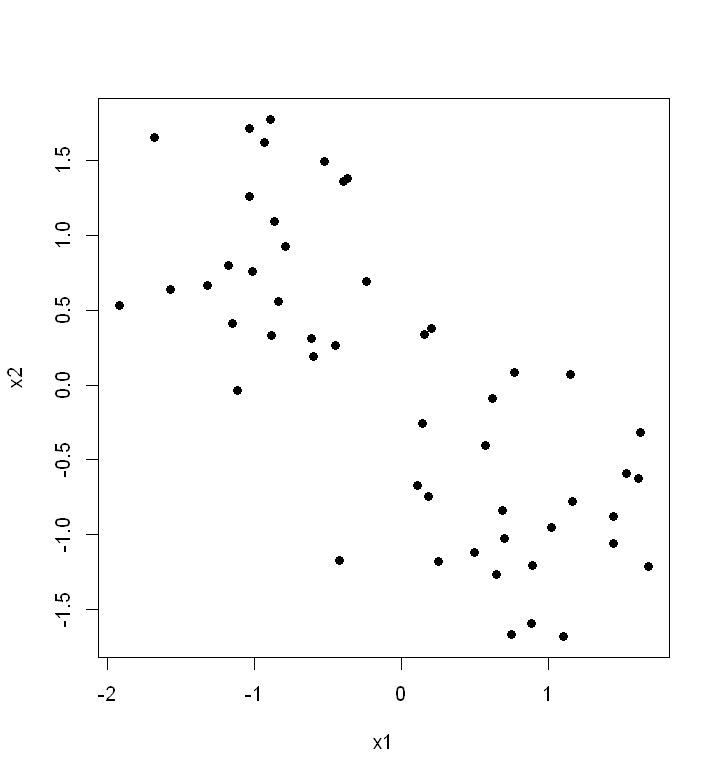

In [33]:
# Scale values before clustering
x_scaled <- scale(x, center=T, scale=T)
mean(x_scaled[, 1])  # Mean = 0
var(x_scaled[, 1])  # SD = 1

# Plot the scaled values
options(repr.plot.width=6, repr.plot.height=6.5)
plot(x_scaled, pch=19, xlab='x1', ylab='x2')

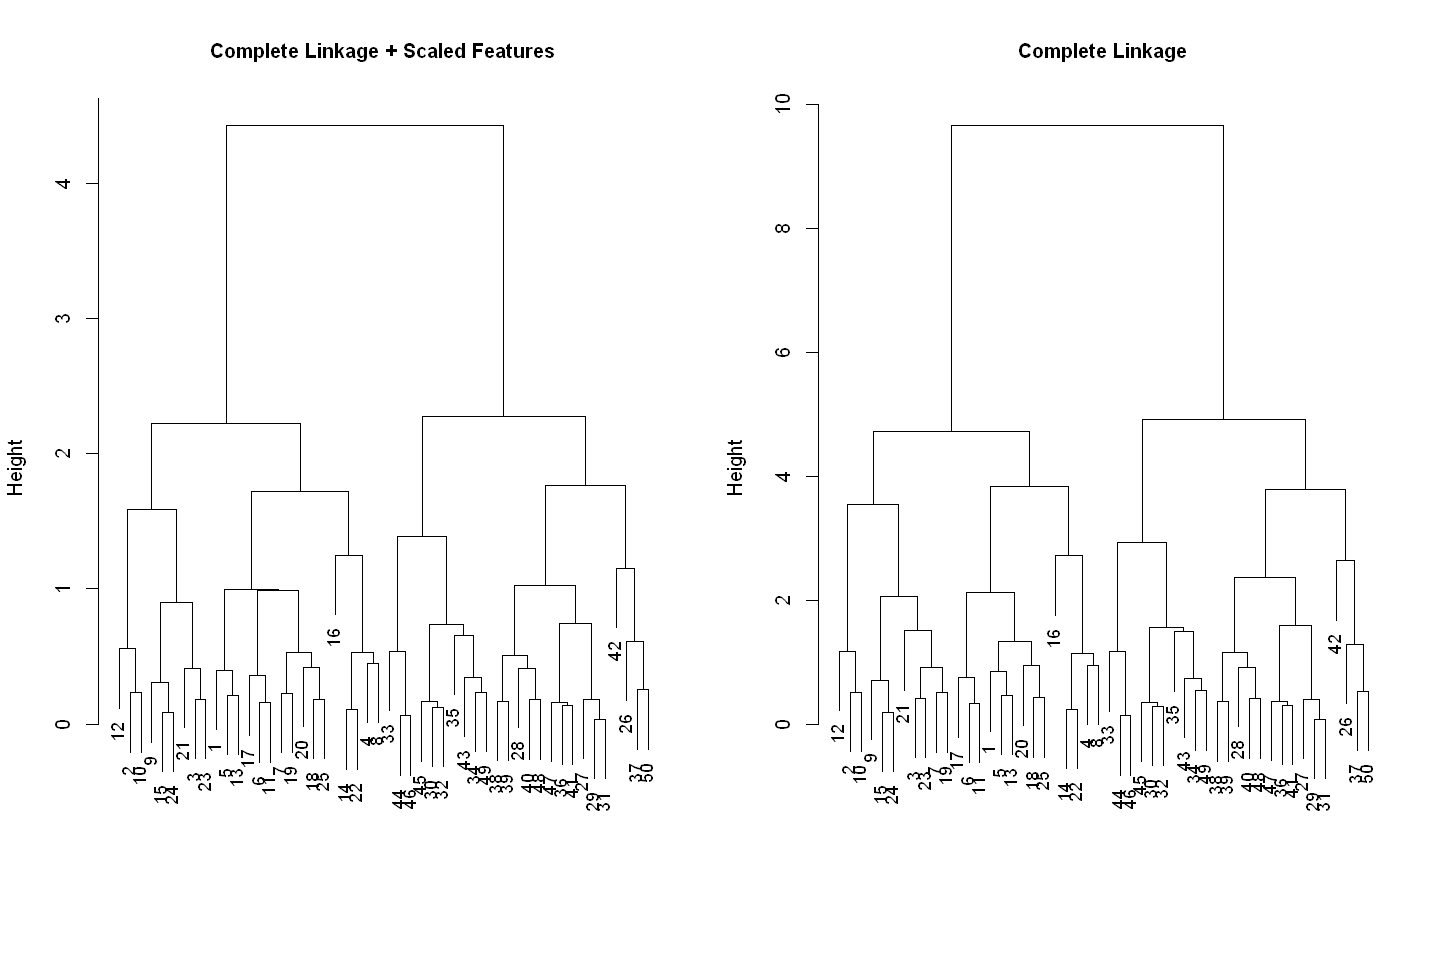

In [34]:
# Plot the dendrogram constructed on scaled data
options(repr.plot.width=12, repr.plot.height=8)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
par(mfrow=c(1, 2))

plot(hclust(dist(x_scaled), method='complete'),
     main='Complete Linkage + Scaled Features', xlab='', sub='', cex=0.9)
plot(hc_complete,
     main='Complete Linkage', xlab='', sub='', cex=0.9)

**Hierarchical clustering with correlation-based distance**

In [35]:
# Create the sample data
x <- matrix(rnorm(30 * 3), ncol=3)
dim(x)
head(x)

[1] 30  3

1.0744594,0.6898042,0.3984673
0.2605978,0.3309632,-0.6380710
-0.3142720,0.8710677,-0.2677129
-0.7496301,-2.0162456,0.3598796
-0.8621983,1.2125791,-1.3128661
2.0480403,1.2004947,-0.8839696


In [36]:
# Calculate Correlation-based distance and Euclidean distance
dd <- as.dist(1 - cor(t(x)))  # Correlation-based distance
dist_x <- dist(x)  # Euclidean distance

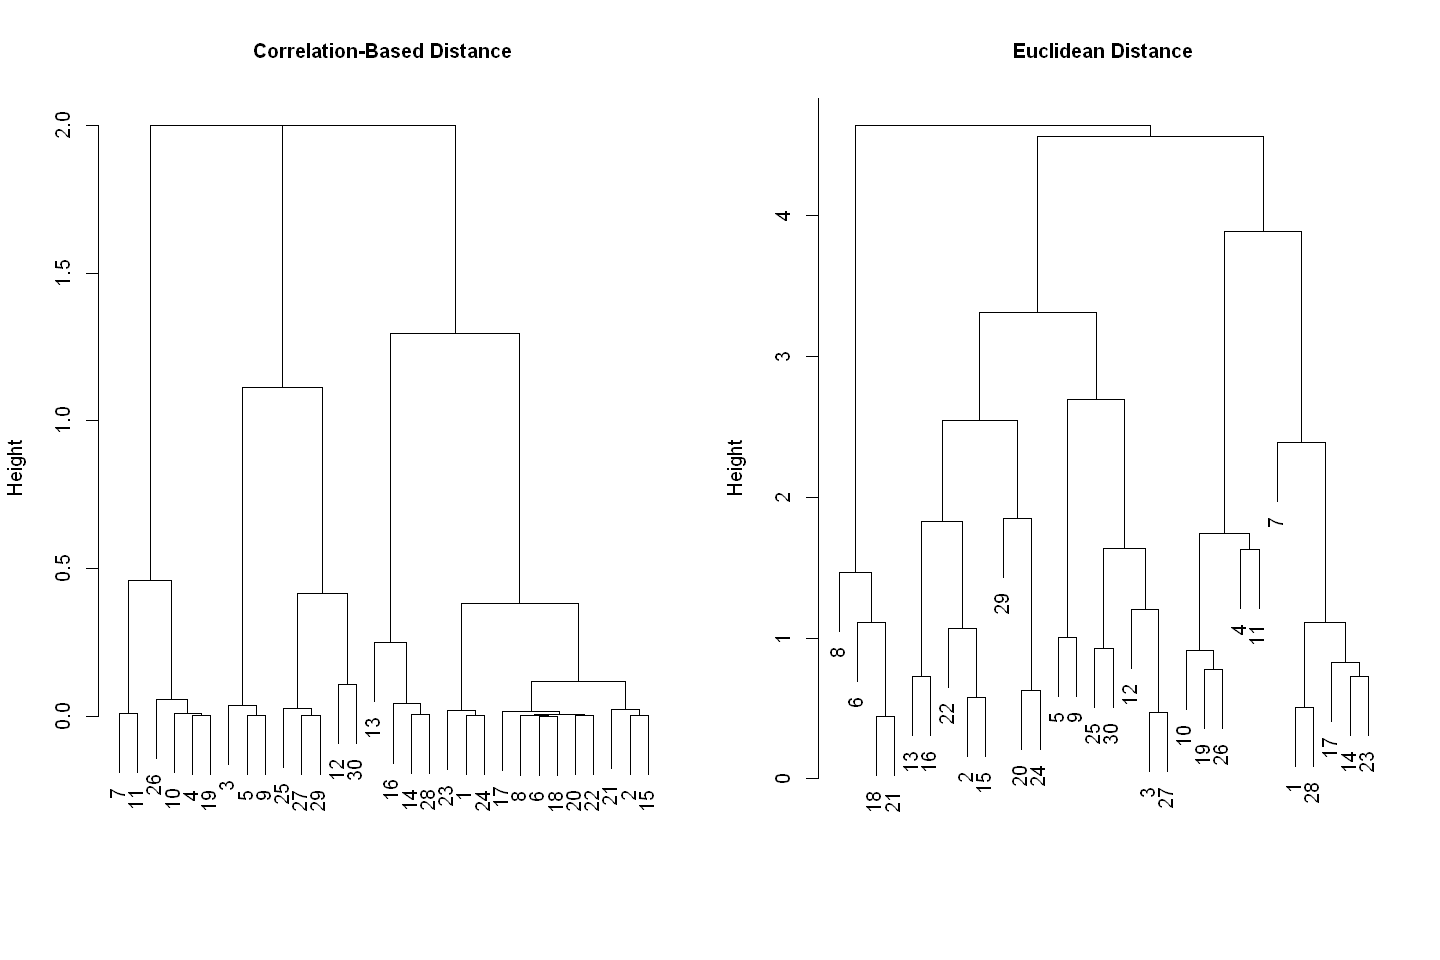

In [38]:
# Plot and compare
options(repr.plot.width=12, repr.plot.height=8)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
par(mfrow=c(1, 2))
plot(hclust(dd, method='complete'),
     main='Correlation-Based Distance', xlab='', sub='')
plot(hclust(dist_x, method='complete'),
     main='Euclidean Distance', xlab='', sub='')

### Lab: Principal Components Analysis & Clustering

1. NCI60 genomic data - PCA, Clustering
2. Table Sales Data - PCA, Clustering

### Lab 1: NCI60 Genomic Data

NCI60 cancer cell line microarray data, consists 6,830 gene expression measurements on 64 cancer cell lines.

**Data exploration**

In [39]:
# Load and check data
library(ISLR)
nci_labs <- NCI60$labs  # 14 types of cancers, 64 cancer cell lines
nci_data <- NCI60$data  # 6,830 gene expression, 64 cancer cell lines
str(nci_labs)
str(nci_data)

 chr [1:64] "CNS" "CNS" "CNS" "RENAL" "BREAST" "CNS" "CNS" "BREAST" "NSCLC" ...
 num [1:64, 1:6830] 0.3 0.68 0.94 0.28 0.485 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:64] "V1" "V2" "V3" "V4" ...
  ..$ : chr [1:6830] "1" "2" "3" "4" ...


In [42]:
# Print out
table(nci_labs)  # Cancer types
head(nci_data)  # Gene expression

nci_labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

,1,2,3,4,5,6,7,8,9,10,⋯,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.45000000,-0.65498050,⋯,-0.9900195,0.000000,0.030000,-0.175000,0.6299805,-0.030000,0.0000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.04003899,-0.28501950,⋯,-0.2700585,-0.300039,-0.250039,-0.535039,0.1099415,-0.860039,-1.2500490,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.43000000,0.47501950,⋯,0.3199805,0.120000,-0.740000,-0.595000,-0.2700195,-0.150000,0.0000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.02000000,0.09501949,⋯,-1.2400200,-0.110000,-0.160000,0.095000,-0.3500195,-0.300000,-1.1500100,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.23500000,1.49001949,⋯,0.5549805,-0.775000,-0.515000,-0.320000,0.6349805,0.605000,0.0000000,0.745000,0.425000,0.145000
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.77000000,-0.24498050,⋯,-0.5900195,0.000000,-0.740000,-2.095000,-1.3900200,-0.400000,0.6999902,0.290000,0.550000,0.000000


**PCA on the NCI60 data**

In [43]:
# The dimension of orginal gene data
dim(nci_data)

[1]   64 6830

In [44]:
# Apply PCA on gene data
pca_out <- prcomp(nci_data, center=T, scale=T)

In [45]:
# The dimension of rotated data
dim(pca_out$x)

[1] 64 64

In [46]:
# The loading vectors
dim(pca_out$rotation)

[1] 6830   64

In [48]:
# Summary the loading vectors
summary(pca_out)$importance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
Standard deviation,27.85347,21.48136,19.82046,17.03256,15.97181,15.72108,14.47145,13.54427,13.14400,12.73860,⋯,5.912333,5.735386,5.47261,5.292148,5.021174,4.683979,4.175673,4.082121,4.041243,1.236942e-14
Proportion of Variance,0.11359,0.06756,0.05752,0.04248,0.03735,0.03619,0.03066,0.02686,0.02529,0.02376,⋯,0.005120,0.004820,0.00438,0.004100,0.003690,0.003210,0.002550,0.002440,0.002390,0.000000e+00
Cumulative Proportion,0.11359,0.18115,0.23867,0.28115,0.31850,0.35468,0.38534,0.41220,0.43750,0.46126,⋯,0.972410,0.977230,0.98161,0.985710,0.989400,0.992620,0.995170,0.997610,1.000000,1.000000e+00


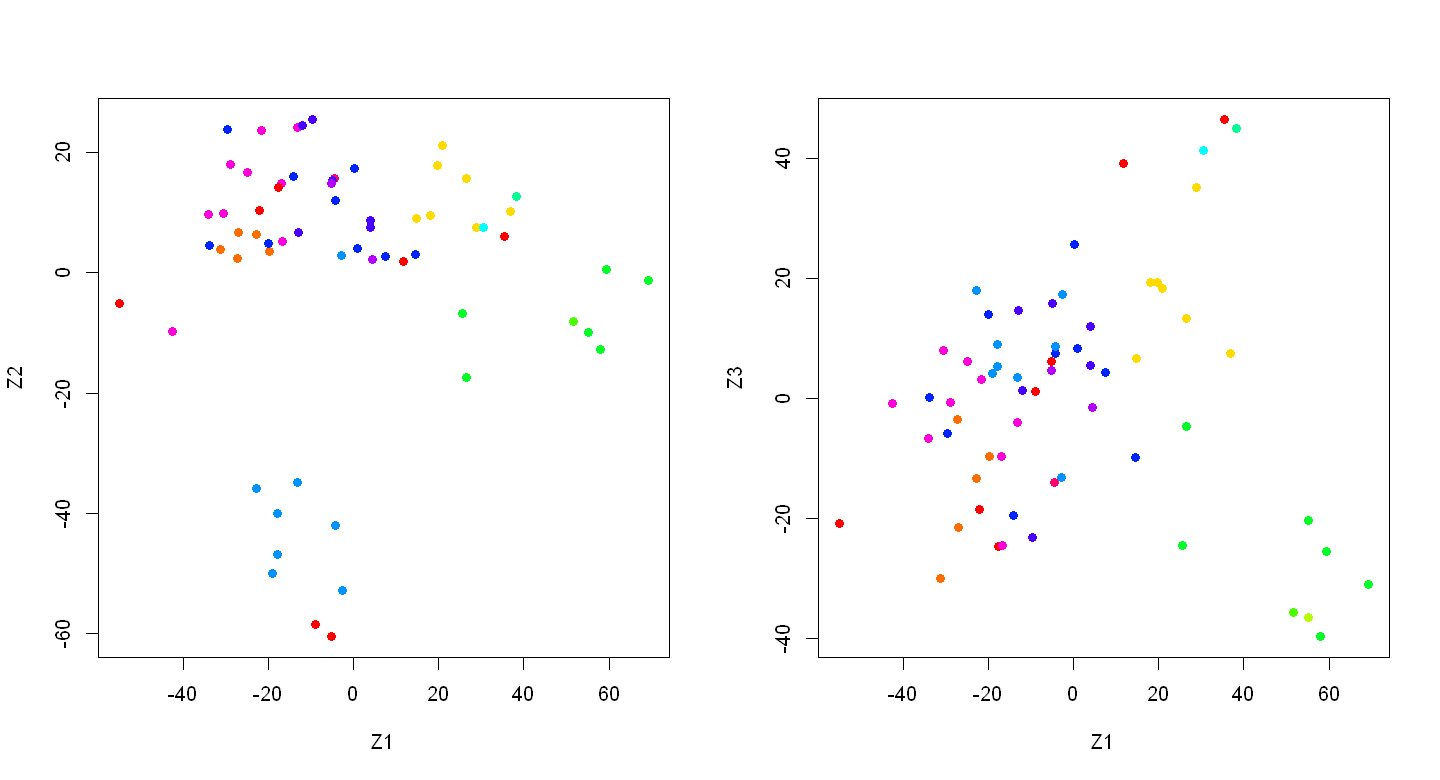

In [49]:
# Function assigns a color to each of 64 cell lines
cols <- function(vec) {
    cols <- rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

# Plot data on the principal components
options(repr.plot.width=12, repr.plot.height=6.5)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
par(mfrow=c(1, 2))
plot(pca_out$x[, 1:2], col=cols(nci_labs), pch=19, xlab='Z1', ylab='Z2')
plot(pca_out$x[, c(1, 3)], col=cols(nci_labs), pch=19, xlab='Z1', ylab='Z3')

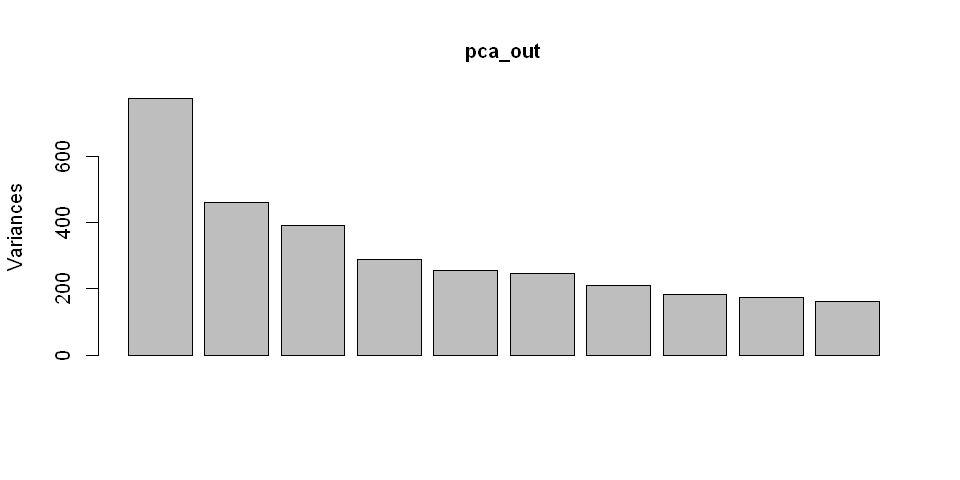

In [50]:
# Plot the variance of each principal components
options(repr.plot.width=8, repr.plot.height=4)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
plot(pca_out)

[1] 11.36  6.76  5.75  4.25  3.73  3.62  3.07  2.69  2.53  2.38

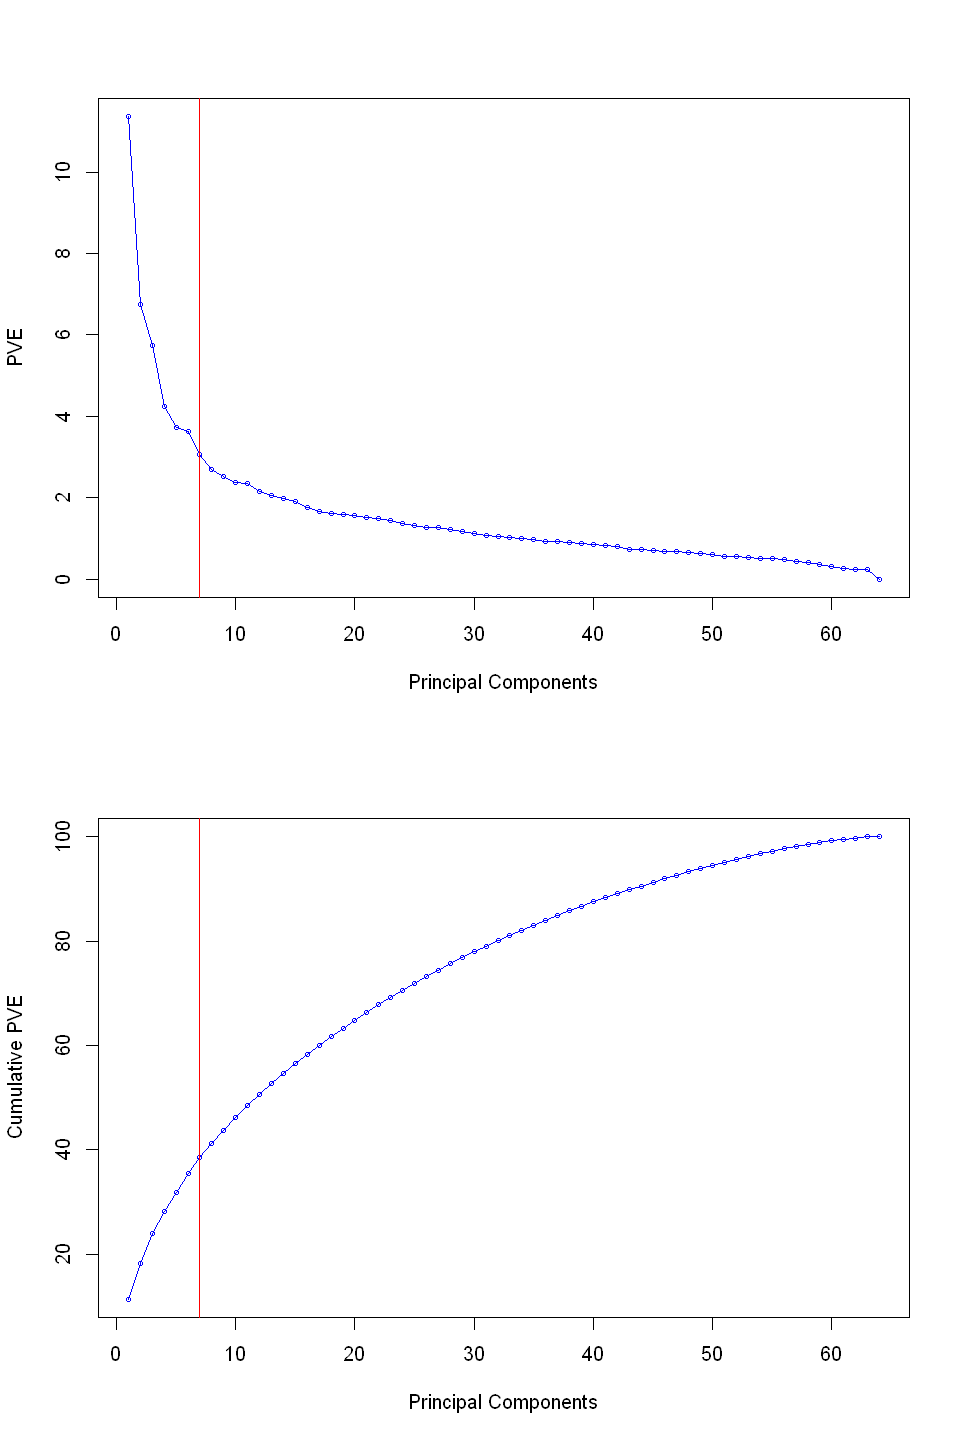

In [51]:
# Scree plot
pve <- 100 * pca_out$sdev ^ 2 / sum(pca_out$sdev ^ 2)
round(pve[1:10], 2)  # Print out some PVE

options(repr.plot.width=8, repr.plot.height=12)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
par(mfrow=c(2, 1))
plot(pve, type='o', ylab='PVE', xlab='Principal Components', col='blue', cex=0.5)
abline(v=7, col='red')
plot(cumsum(pve), type='o', ylab='Cumulative PVE', xlab='Principal Components', col='blue', cex=0.5)
abline(v=7, col='red')

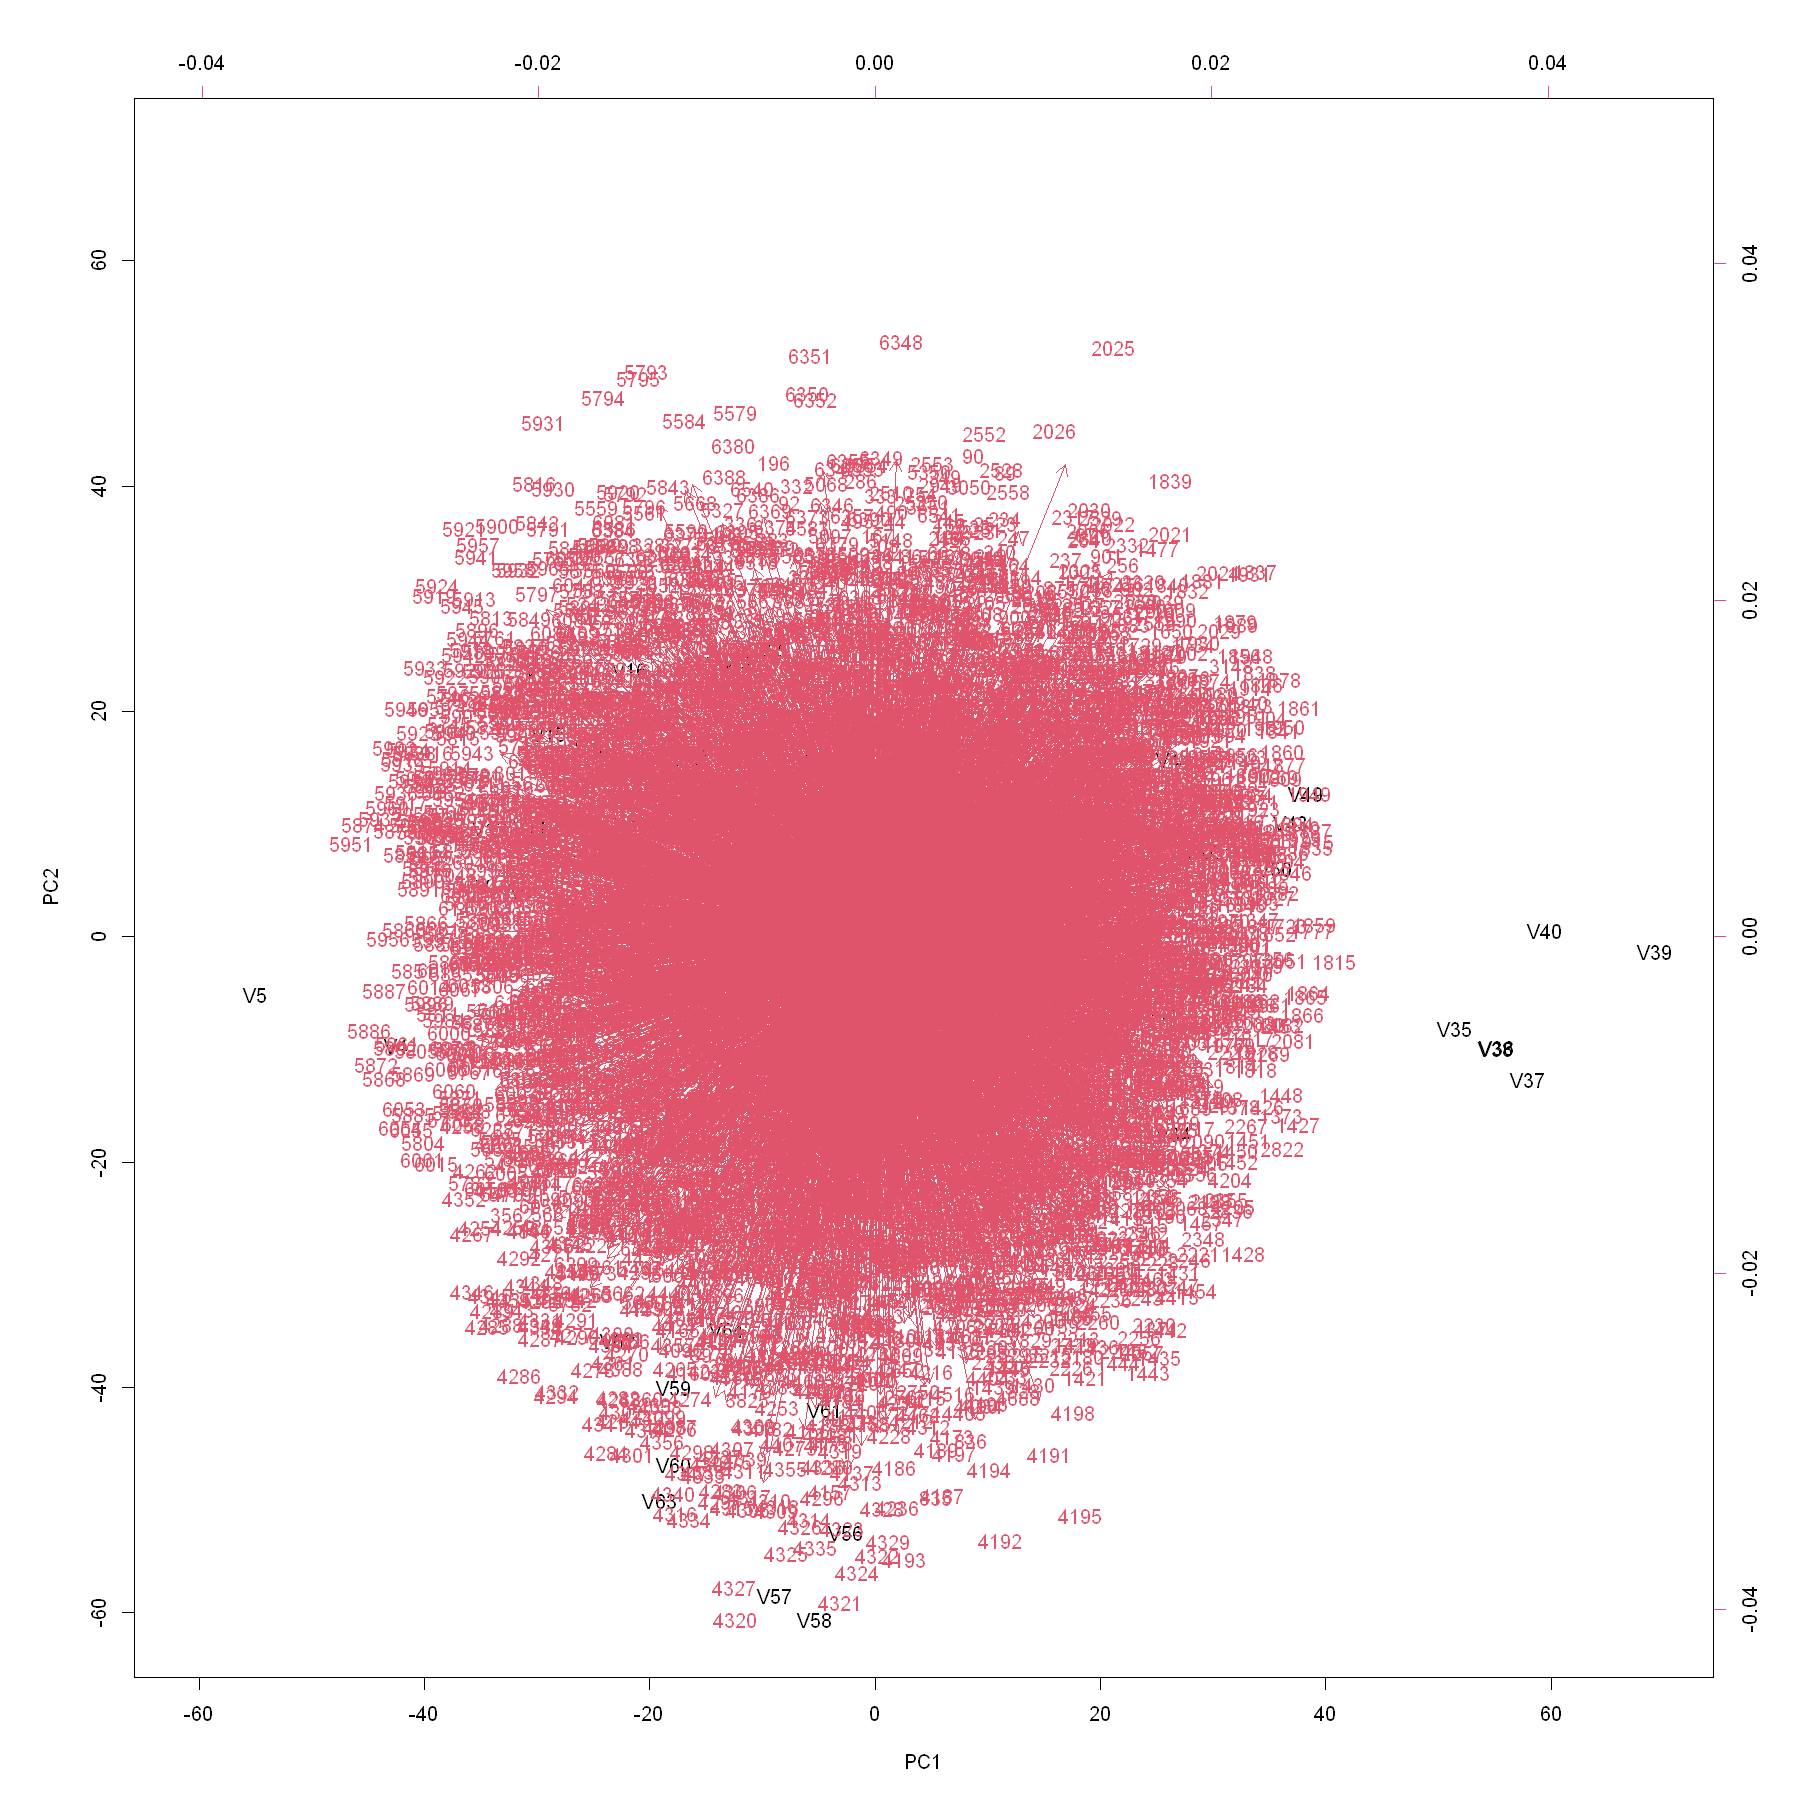

In [52]:
# Plot the first two principal components: biplot
options(repr.plot.width=15, repr.plot.height=15)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
biplot(pca_out, scale=0, cex=1)

**Clustering NCI60 data - Hierarchical**

In [53]:
# Prepare data
nci_scaled <- scale(nci_data)

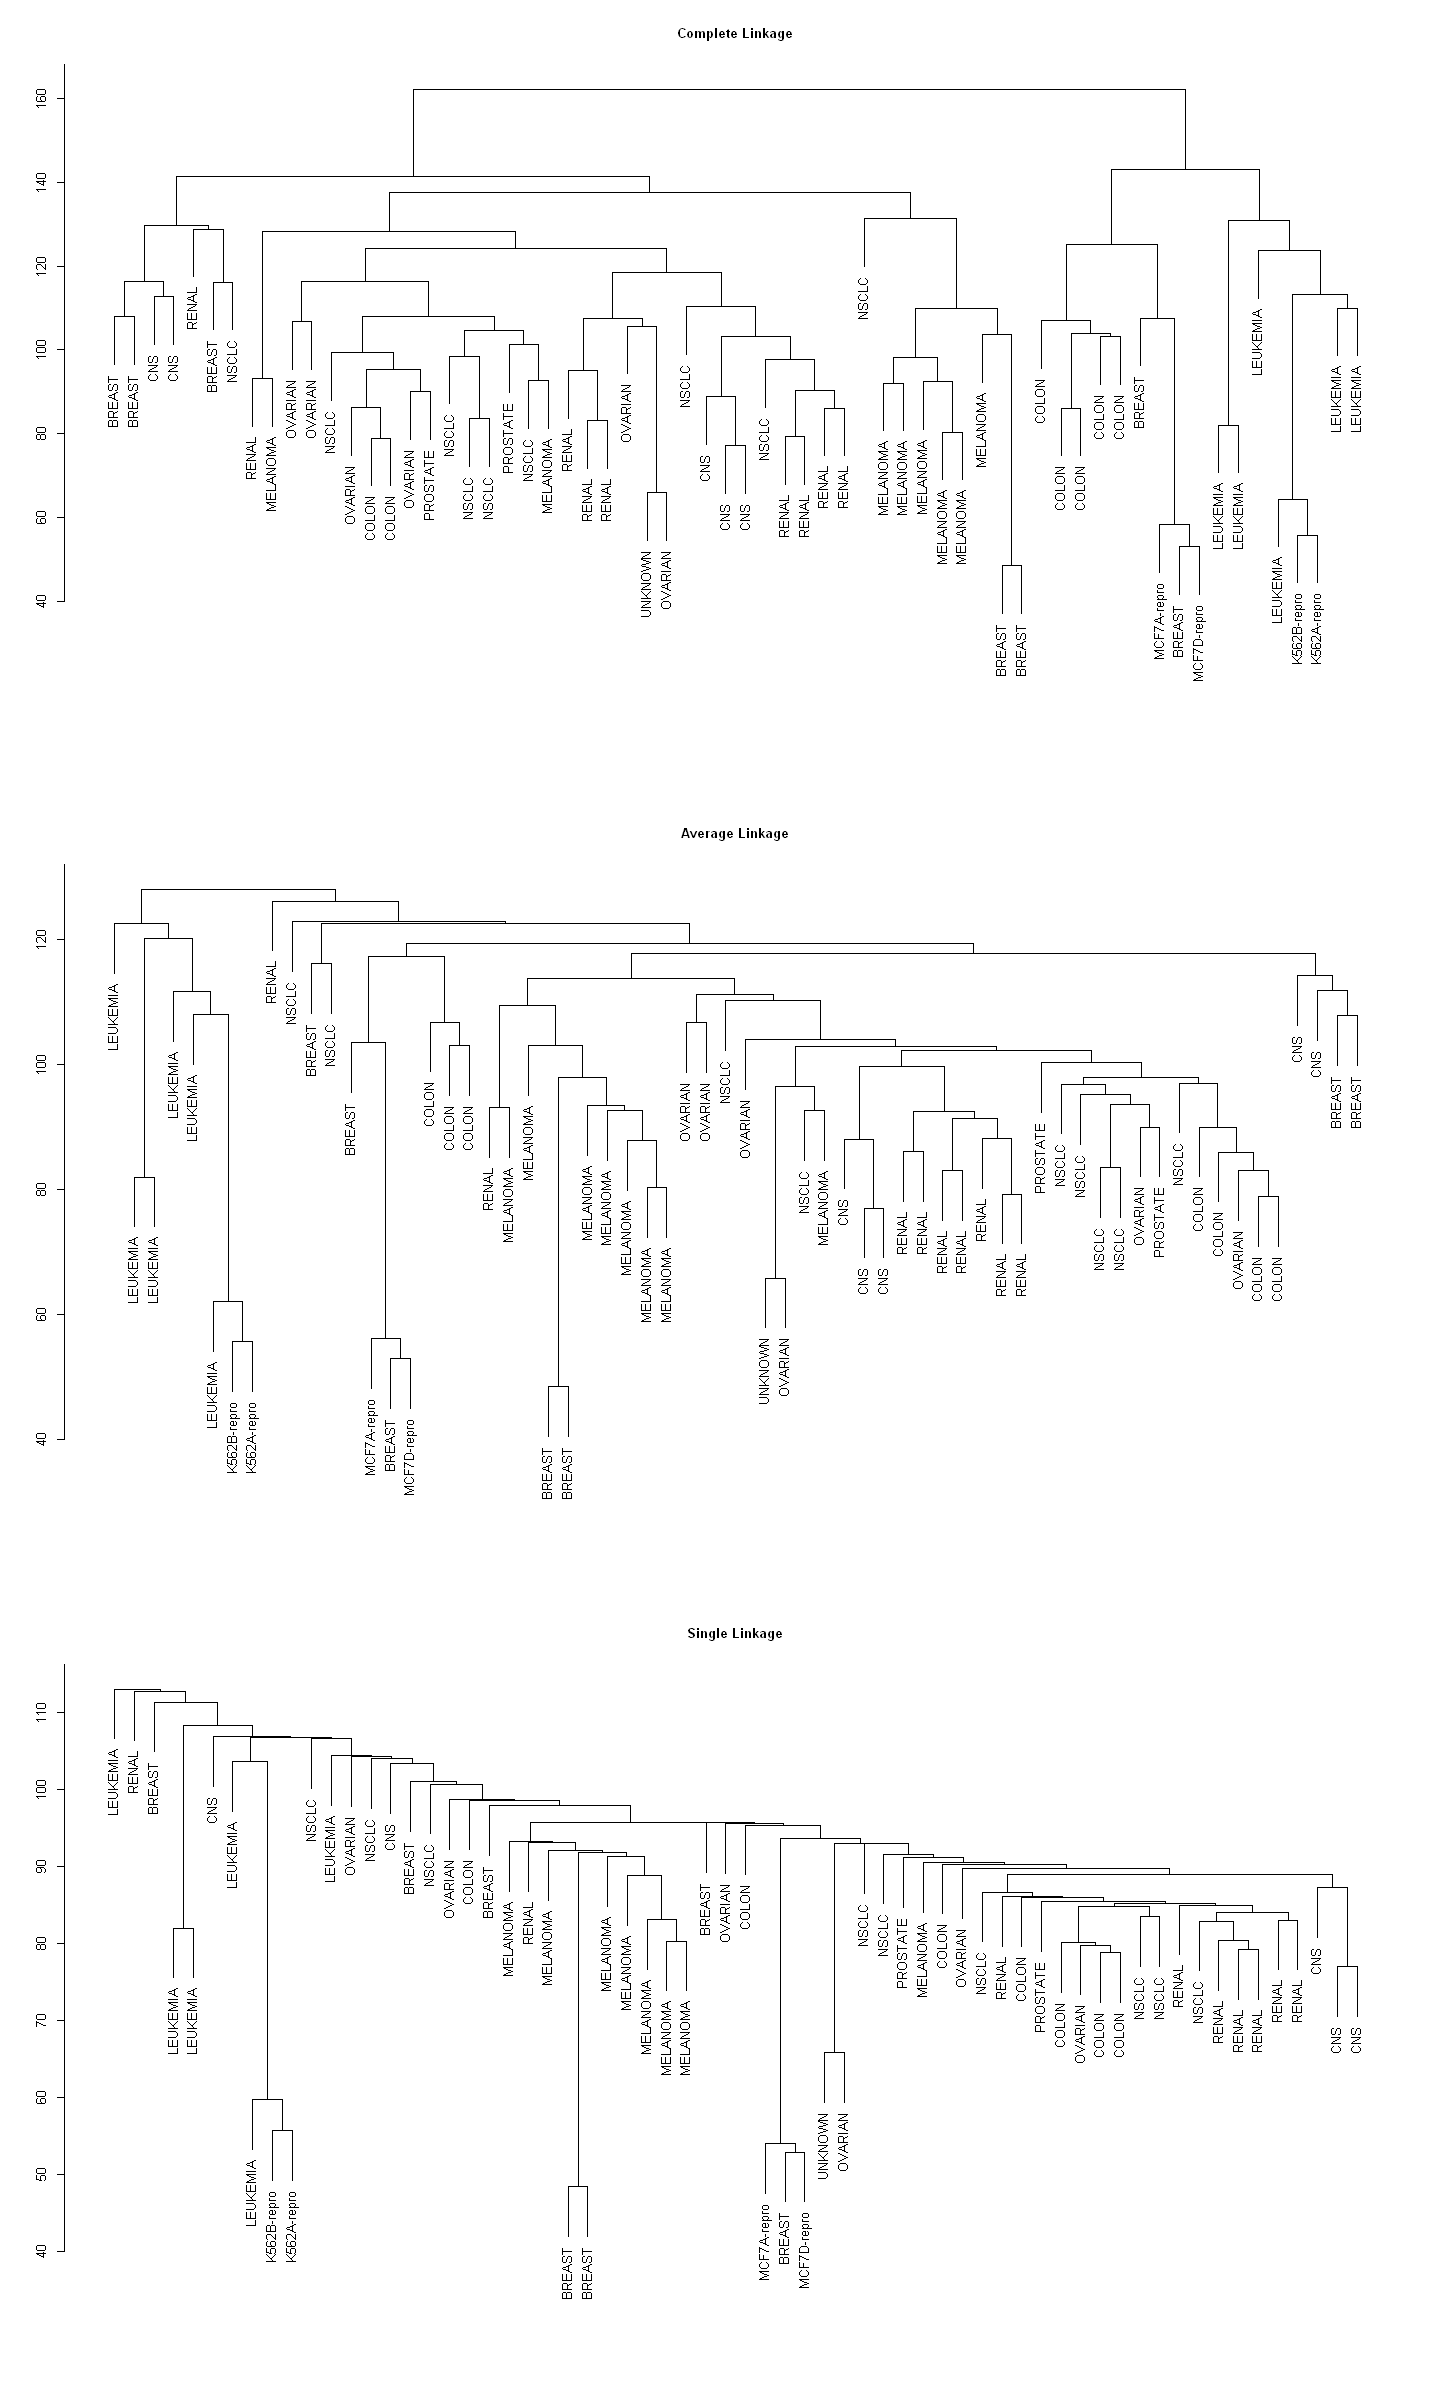

In [54]:
# Hierarchical clustering using 3 types of linkage
options(repr.plot.width=12, repr.plot.height=20)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
par(mfrow=c(3, 1))
dist_x <- dist(nci_scaled)  # Euclidean distance
plot(hclust(dist_x, method='complete'), labels=nci_labs,
     main='Complete Linkage', xlab='', sub='', ylab='')
plot(hclust(dist_x, method='average'), labels=nci_labs,
     main='Average Linkage', xlab='', sub='', ylab='')
plot(hclust(dist_x, method='single'), labels=nci_labs,
     main='Single Linkage', xlab='', sub='', ylab='')

In [55]:
# Complete linkage, 4 clusters
hc_out <- hclust(dist(nci_scaled), method='complete')
hc_clusters <- cutree(hc_out, k=4)
table(hc_clusters, nci_labs)

           nci_labs
hc_clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci_labs
hc_clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

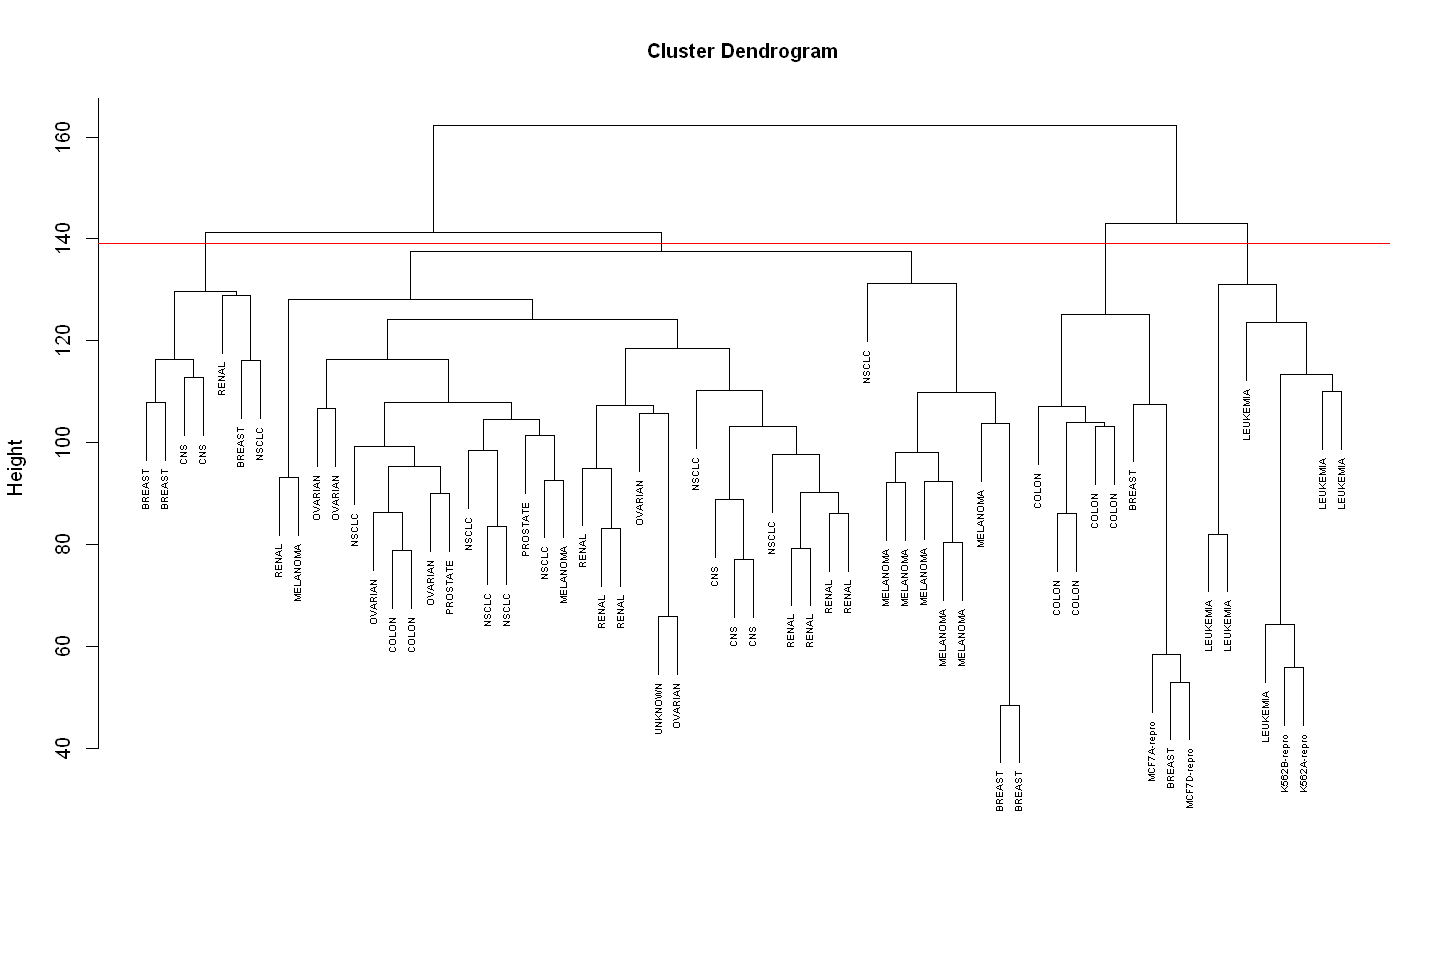

In [56]:
# Plot the dendrogram with 4 clusters
options(repr.plot.width=12, repr.plot.height=8)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
plot(hc_out, labels=nci_labs, cex=0.5, xlab='', sub='')
abline(h=139, col='red')

In [57]:
# Summary of the dendrogram
hc_out


Call:
hclust(d = dist(nci_scaled), method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


**Clustering NCI60 data - K-Means**

In [58]:
# Clustering using K-Means, 4 clusters
set.seed(2)
km_out <- kmeans(nci_scaled, 4, nstart=20)

In [59]:
# Compare clusters result between K-means and Hierarchical clustering
km_clusters <- km_out$cluster
table(km_clusters, hc_clusters)

           hc_clusters
km_clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0

**Hierarchical clustering on first few principal components (de-noising data)**

In [60]:
# First 5 principal components of the gene expression data
head(pca_out$x[, 1:5])

,PC1,PC2,PC3,PC4,PC5
V1,-19.68245,3.527748,-9.7354382,0.8177816,-12.511081
V2,-22.90812,6.390938,-13.3725378,-5.5911088,-7.972471
V3,-27.24077,2.445809,-3.5053437,1.3311502,-12.466296
V4,-42.48098,-9.691742,-0.8830921,-3.4180227,-41.938370
V5,-54.98387,-5.158121,-20.9291076,-15.7253986,-10.361364
V6,-26.96488,6.727122,-21.6422924,-13.7323153,7.934827


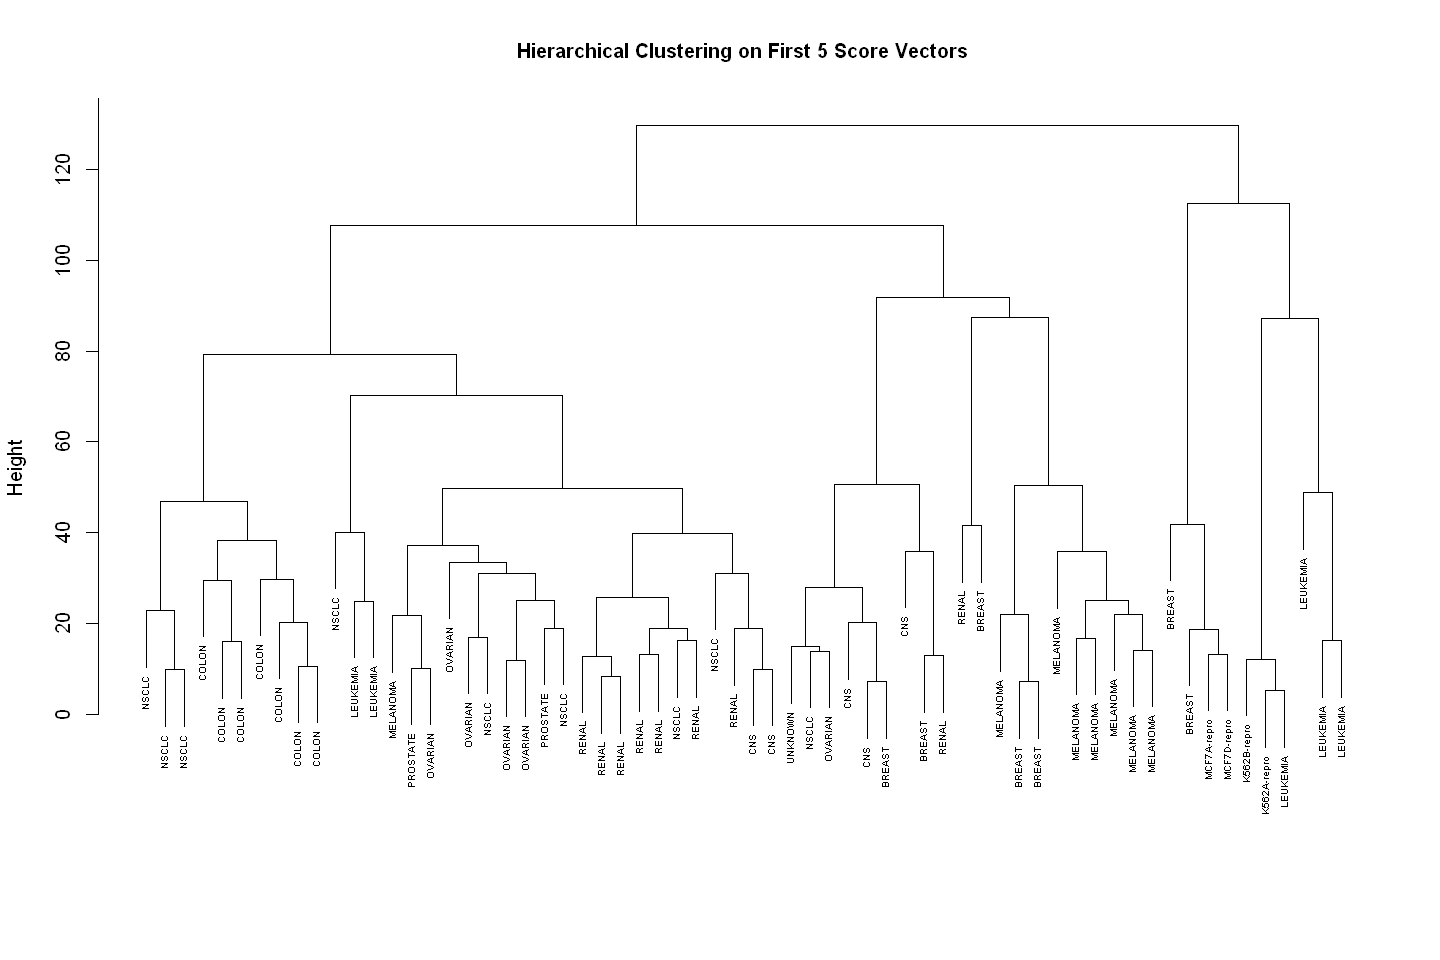

In [61]:
# Run hierarchical clustering on the first 5 principal components
hc_out5 <- hclust(dist(pca_out$x[, 1:5]))

# Plot
options(repr.plot.width=12, repr.plot.height=8)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
plot(hc_out5, labels=nci_labs, main='Hierarchical Clustering on First 5 Score Vectors',
     cex=0.5, xlab='', sub='')

### Lab 2: Table Sales Data

- Q1: Use PCA and biplot to visualize the Table Sales Data. How many principle components we can keep? According to the biplot, how many groups of customers are there?
- Q2: Apply kMeans to the Table Sales Data. What is the optimum number of kMeans clusters? Compare the kMeans clusters with the PCA biplot?

Source: https://towardsdatascience.com/how-to-cluster-your-customer-data-with-r-code-examples-6c7e4aa6c5b1

**Explore the data**

In [62]:
# Input data: Table sales
# Age : Age of customer (year)
# Average.table.size : Average size of tables purchased by customer (square inches)
# Purchases.per.year : Number of tables purchased per year by customer (times)
# Dollars.per.purchase : Average amount of money purchased by customer (dollars)
sales <- read.csv('./data/sales_data.csv')
str(sales)

'data.frame':	30 obs. of  4 variables:
 $ Age                 : int  23 24 26 33 21 34 36 36 32 38 ...
 $ Average.table.size  : int  576 720 576 1008 720 1008 1008 1260 576 576 ...
 $ Purchases.per.year  : int  1 1 1 6 1 6 3 3 4 4 ...
 $ Dollars.per.purchase: int  100 200 125 750 250 950 900 1200 200 150 ...


In [63]:
# Print some data
head(sales)

,Age,Average.table.size,Purchases.per.year,Dollars.per.purchase
,<int>,<int>,<int>,<int>
1,23,576,1,100
2,24,720,1,200
3,26,576,1,125
4,33,1008,6,750
5,21,720,1,250
6,34,1008,6,950


In [64]:
# Summary data
summary(sales)

      Age        Average.table.size Purchases.per.year Dollars.per.purchase
 Min.   :21.00   Min.   : 576       Min.   : 1.000     Min.   :  90.0      
 1st Qu.:32.25   1st Qu.: 612       1st Qu.: 1.000     1st Qu.: 231.2      
 Median :38.50   Median :1008       Median : 1.500     Median : 712.5      
 Mean   :40.77   Mean   :1094       Mean   : 3.167     Mean   : 794.7      
 3rd Qu.:50.50   3rd Qu.:1260       3rd Qu.: 4.000     3rd Qu.:1000.0      
 Max.   :70.00   Max.   :2160       Max.   :12.000     Max.   :2250.0      

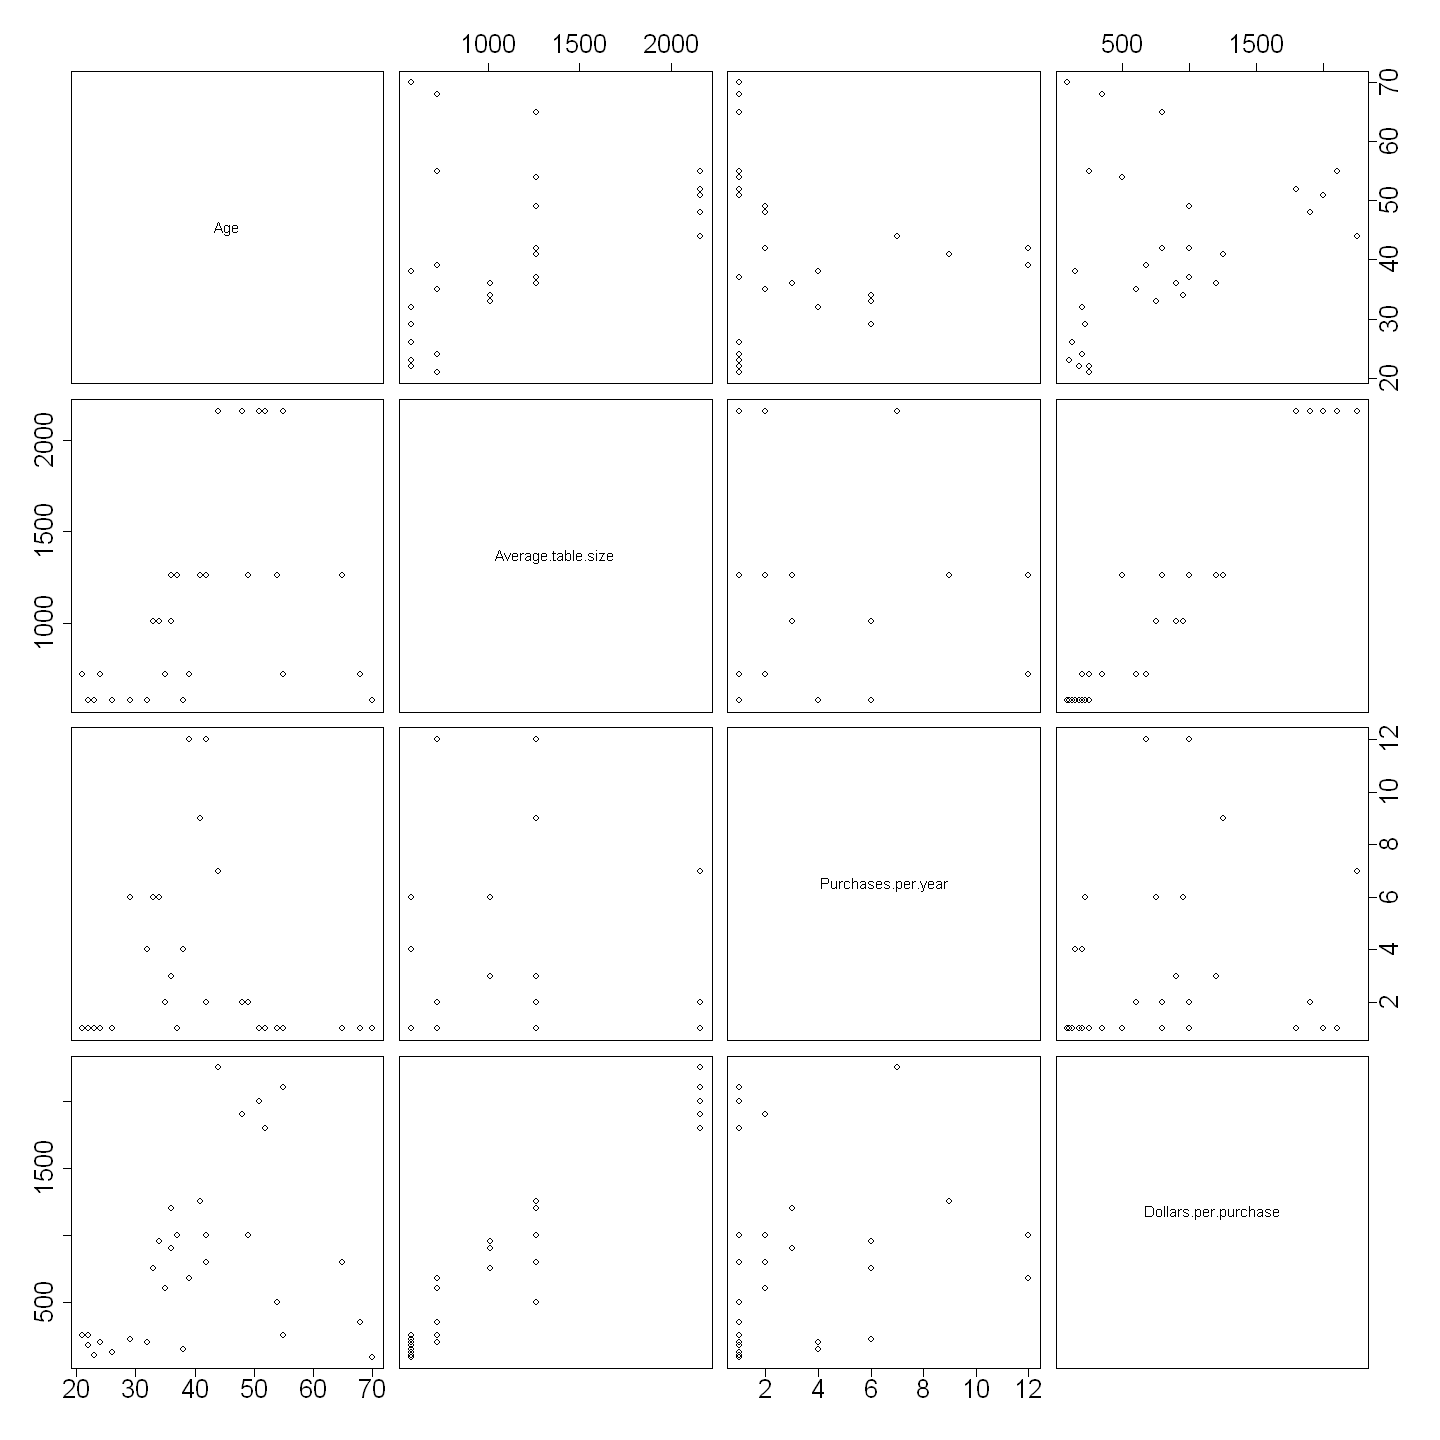

In [65]:
# Plot data
options(repr.plot.width=12, repr.plot.height=12)
par(cex.lab=2, cex.axis=2, cex.main=2, cex.sub=2)
pairs(sales, cex=1)

**Q1:** Use PCA and biplot to visualize the Table Sales Data. How many principle components we can keep? According to the biplot, how many groups of customers are there?

**PCA**

In [66]:
# Apply PCA with scale
sale_pca <- prcomp(sales, center=T, scale=T)

In [67]:
# Summary the resuls
summary(sale_pca)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4842 1.0437 0.8277 0.15045
Proportion of Variance 0.5507 0.2723 0.1713 0.00566
Cumulative Proportion  0.5507 0.8231 0.9943 1.00000

In [68]:
# Show the loading vectors
sale_pca$rotation

,PC1,PC2,PC3,PC4
Age,0.40188974,0.41951878,-0.8126360,0.04595016
Average.table.size,0.65250771,-0.02375505,0.2704303,-0.70748630
Purchases.per.year,0.04063879,-0.88890508,-0.4445967,-0.10261583
Dollars.per.purchase,0.64114492,-0.18244847,0.2623433,0.69772610


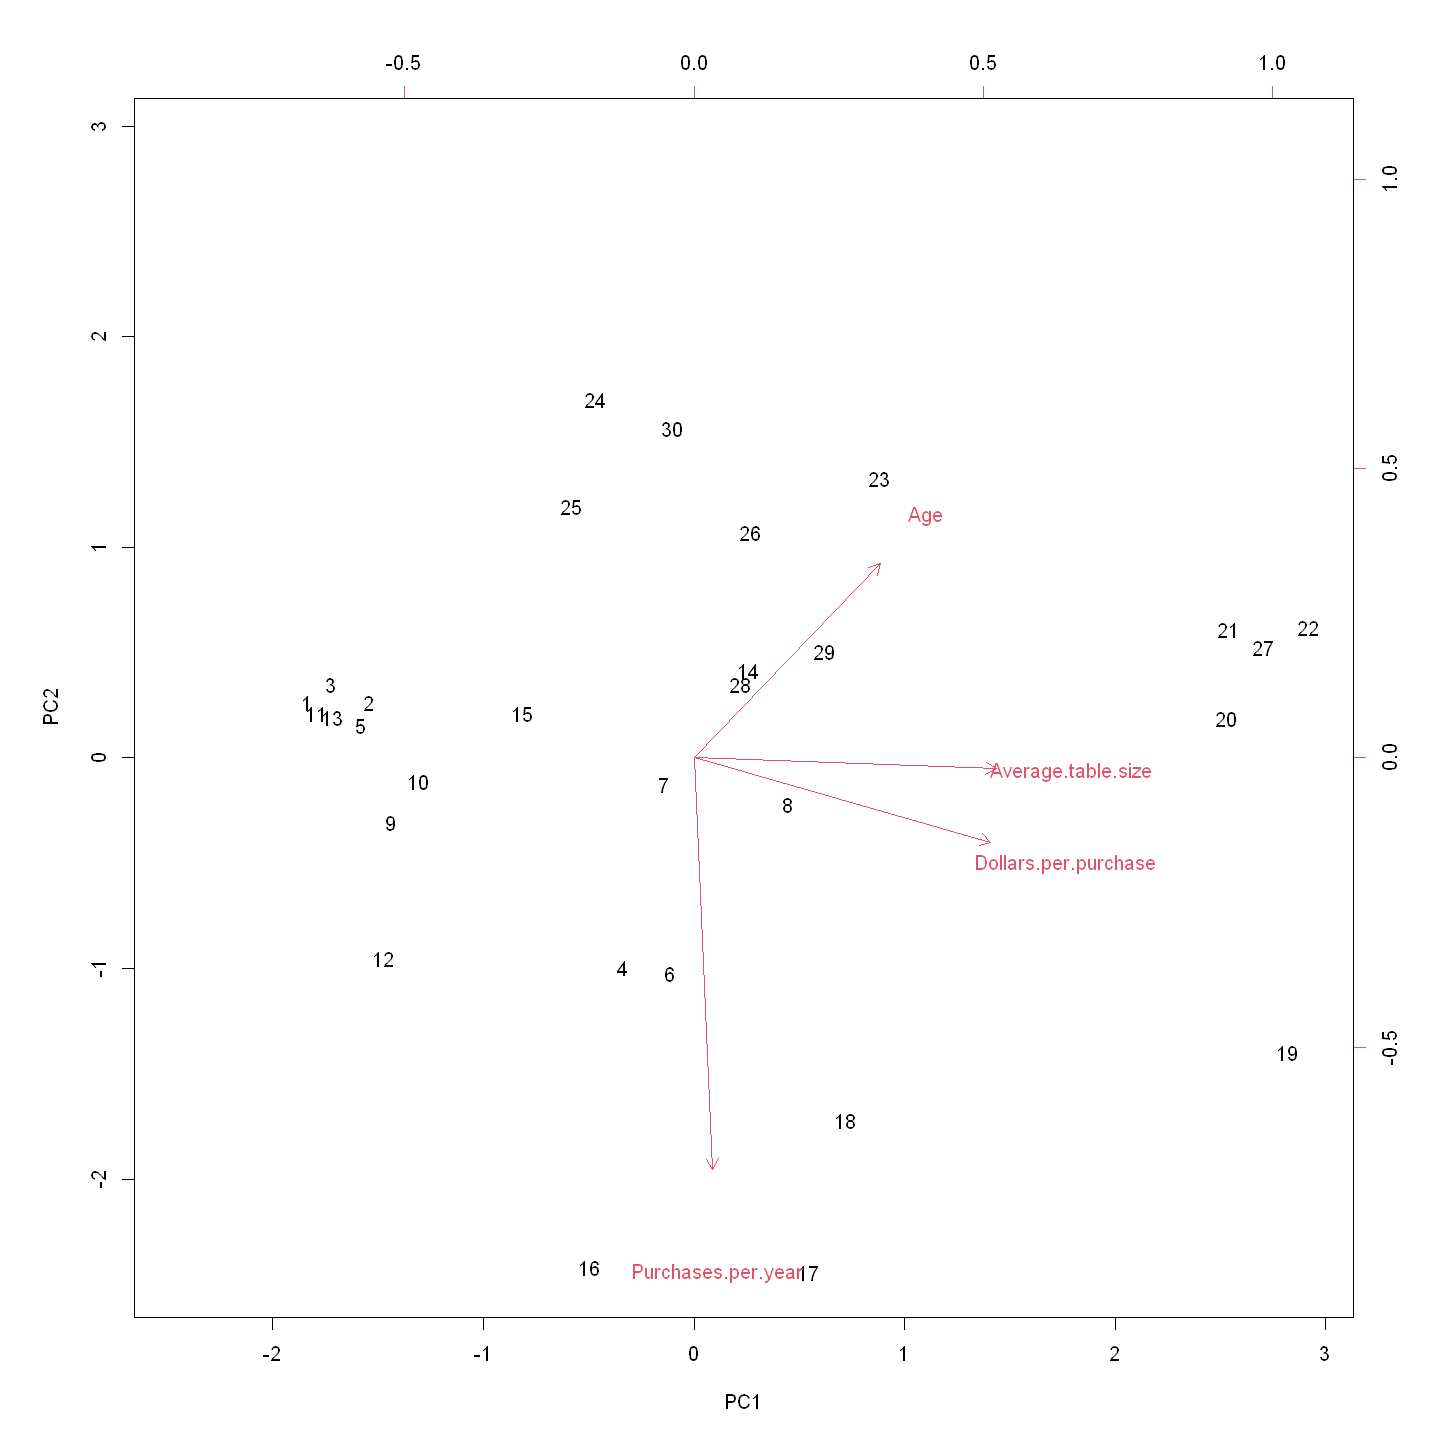

In [69]:
# Plot the first two principal components: biplot
options(repr.plot.width=12, repr.plot.height=12)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
biplot(sale_pca, scale=0, cex=1)

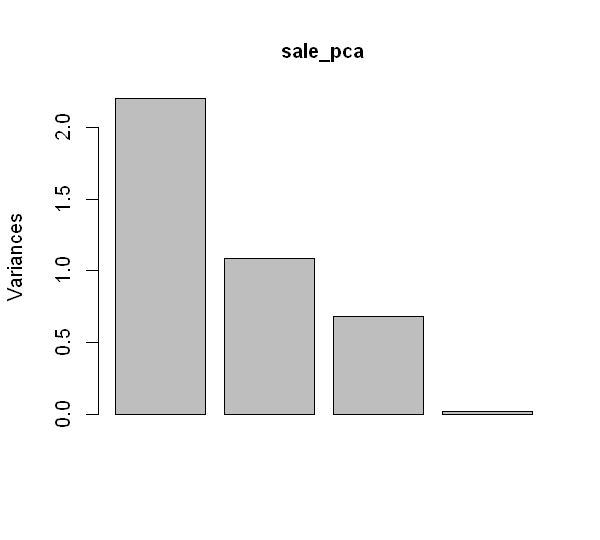

In [70]:
# Plot the variance of each principal components
options(repr.plot.width=5, repr.plot.height=4.5)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
plot(sale_pca)

[1] 0.550743808 0.272321322 0.171276353 0.005658518

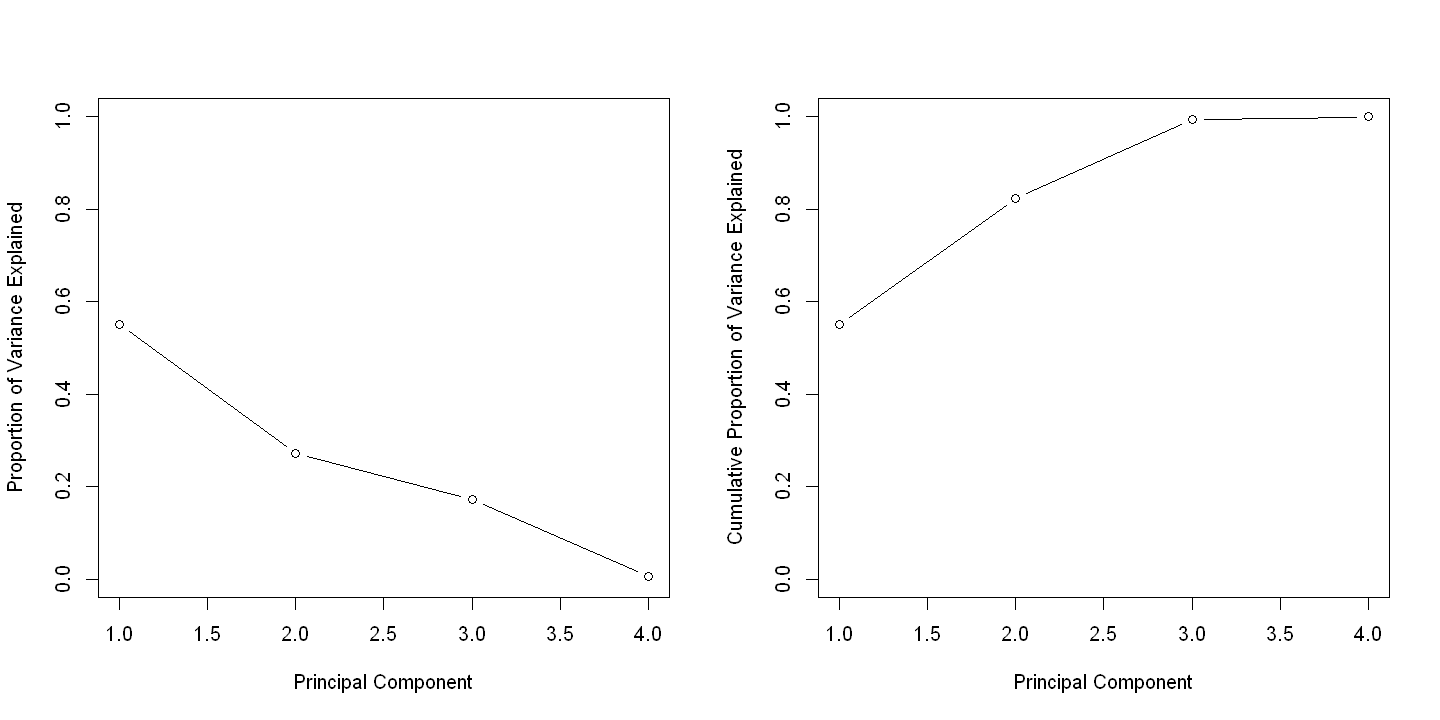

In [71]:
# Proportion of variance explained (PVE) by each principal component
pca_var <- sale_pca$sdev ^ 2
pve <- pca_var / sum(pca_var)
pve

# Plot the PVE
options(repr.plot.width=12, repr.plot.height=6)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
par(mfrow=c(1, 2))
plot(pve, xlab='Principal Component', ylab='Proportion of Variance Explained',
     ylim=c(0, 1), type='b')
plot(cumsum(pve), xlab='Principal Component', ylab='Cumulative Proportion of Variance Explained',
     ylim=c(0, 1), type='b')

**Q2:** Apply kMeans to the Table Sales Data. What is the optimum number of kMeans clusters? Compare the kMeans clusters with the PCA biplot?

**Clustering**

In [72]:
# K-means with different k
total_wss <- c()  # Total within sum squares
for (k in c(1:25)) {
    km <- kmeans(sales, k, nstart=30)
    total_wss <- c(total_wss, km$tot.withinss)
}

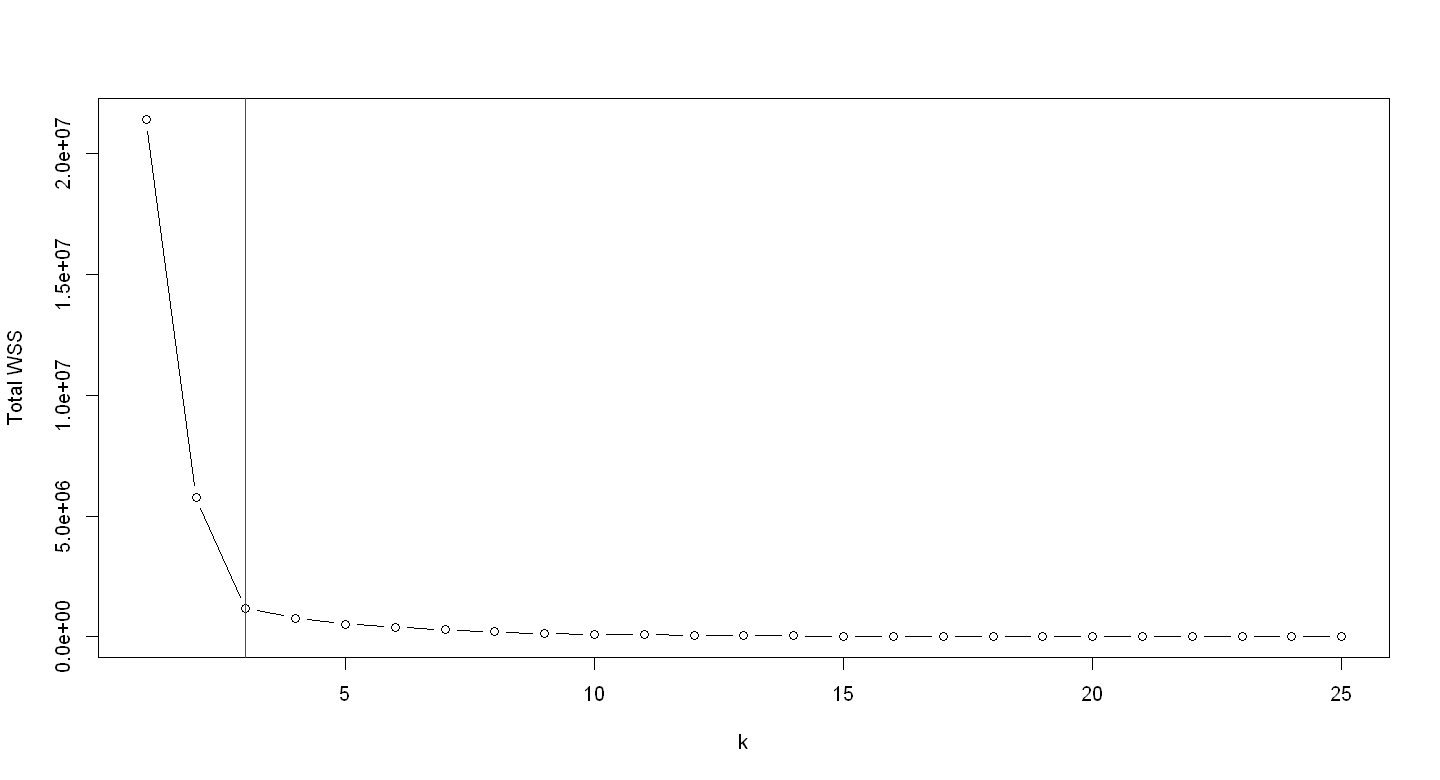

In [73]:
# Scree plot
options(repr.plot.width=12, repr.plot.height=6.5)
par(cex.lab=1, cex.axis=1, cex.main=1, cex.sub=1)
plot(total_wss, xlab='k', ylab='Total WSS', type='b')
abline(v=3, col='red')

In [74]:
# Re-build the K-Means model with best k
km_best <- kmeans(sales, 3, nstart=30)
km_best

K-means clustering with 3 clusters of sizes 11, 14, 5

Cluster means:
       Age Average.table.size Purchases.per.year Dollars.per.purchase
1 42.63636          1191.2727           4.181818             922.7273
2 36.00000           637.7143           2.642857             260.0000
3 50.00000          2160.0000           2.400000            2010.0000

Clustering vector:
 [1] 2 2 2 1 2 1 1 1 2 2 2 2 2 1 2 2 1 1 3 3 3 3 1 2 2 1 3 1 1 2

Within cluster sum of squares by cluster:
[1] 581466.5 471572.1 122097.2
 (between_SS / total_SS =  94.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [75]:
# Add new column to the data
sales$cluster <- km_best$cluster

In [76]:
# Summary customer in the 1st segment
summary(sales[sales$cluster == 1, ])

      Age        Average.table.size Purchases.per.year Dollars.per.purchase
 Min.   :33.00   Min.   :1008       Min.   : 1.000     Min.   : 500.0      
 1st Qu.:36.00   1st Qu.:1134       1st Qu.: 1.500     1st Qu.: 800.0      
 Median :41.00   Median :1260       Median : 3.000     Median : 950.0      
 Mean   :42.64   Mean   :1191       Mean   : 4.182     Mean   : 922.7      
 3rd Qu.:45.50   3rd Qu.:1260       3rd Qu.: 6.000     3rd Qu.:1000.0      
 Max.   :65.00   Max.   :1260       Max.   :12.000     Max.   :1250.0      
    cluster 
 Min.   :1  
 1st Qu.:1  
 Median :1  
 Mean   :1  
 3rd Qu.:1  
 Max.   :1  

In [77]:
# Summary customer in the 2nd segment
summary(sales[sales$cluster == 2, ])

      Age        Average.table.size Purchases.per.year Dollars.per.purchase
 Min.   :21.00   Min.   :576.0      Min.   : 1.000     Min.   : 90.0       
 1st Qu.:23.25   1st Qu.:576.0      1st Qu.: 1.000     1st Qu.:156.2       
 Median :30.50   Median :576.0      Median : 1.000     Median :212.5       
 Mean   :36.00   Mean   :637.7      Mean   : 2.643     Mean   :260.0       
 3rd Qu.:38.75   3rd Qu.:720.0      3rd Qu.: 3.500     3rd Qu.:250.0       
 Max.   :70.00   Max.   :720.0      Max.   :12.000     Max.   :675.0       
    cluster 
 Min.   :2  
 1st Qu.:2  
 Median :2  
 Mean   :2  
 3rd Qu.:2  
 Max.   :2  

In [78]:
# Summary customer in the 3rd segment
summary(sales[sales$cluster == 3, ])

      Age     Average.table.size Purchases.per.year Dollars.per.purchase
 Min.   :44   Min.   :2160       Min.   :1.0        Min.   :1800        
 1st Qu.:48   1st Qu.:2160       1st Qu.:1.0        1st Qu.:1900        
 Median :51   Median :2160       Median :1.0        Median :2000        
 Mean   :50   Mean   :2160       Mean   :2.4        Mean   :2010        
 3rd Qu.:52   3rd Qu.:2160       3rd Qu.:2.0        3rd Qu.:2100        
 Max.   :55   Max.   :2160       Max.   :7.0        Max.   :2250        
    cluster 
 Min.   :3  
 1st Qu.:3  
 Median :3  
 Mean   :3  
 3rd Qu.:3  
 Max.   :3  

## Homework
- Exercise 3 (p.410, Chap.10), 3 (p.414, Chap.10), 8 (p.416, Chap.10), 9 (p.416, Chap.10) and 10 (p.417, Chap.10)

1,4
1,3
0,4
5,1
6,2
4,0


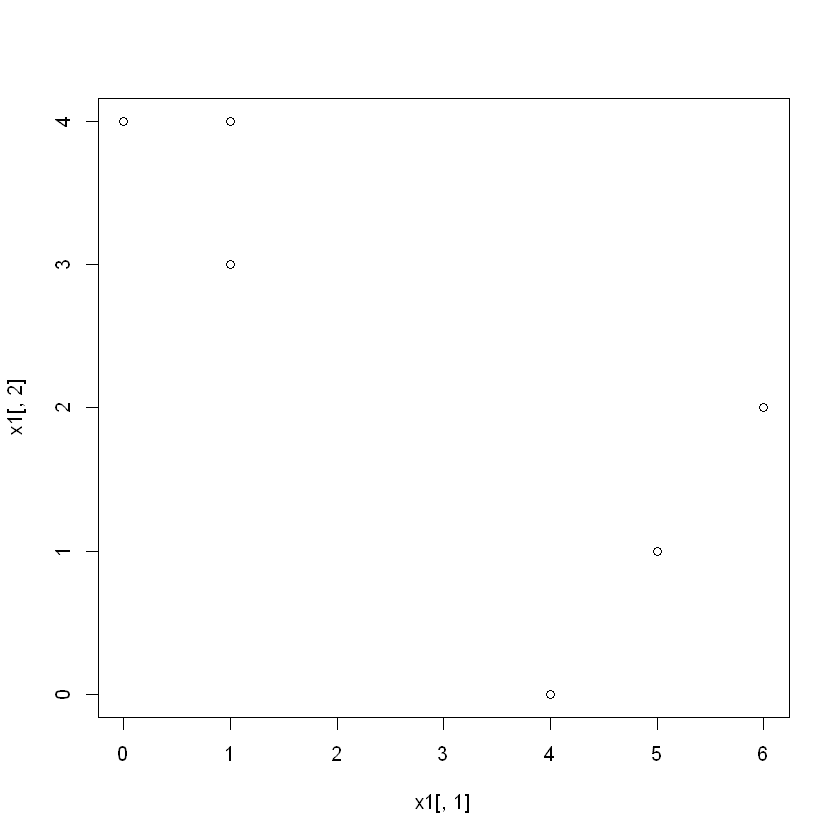

In [2]:
#Exercise 3, Chapter 10

#A)
set.seed(123)
x1 = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
x1

#plot

plot(x1[,1], x1[,2])


In [3]:
#B)
s = sample(2, nrow(x1), replace=T)
s


[1] 1 1 1 2 1 2

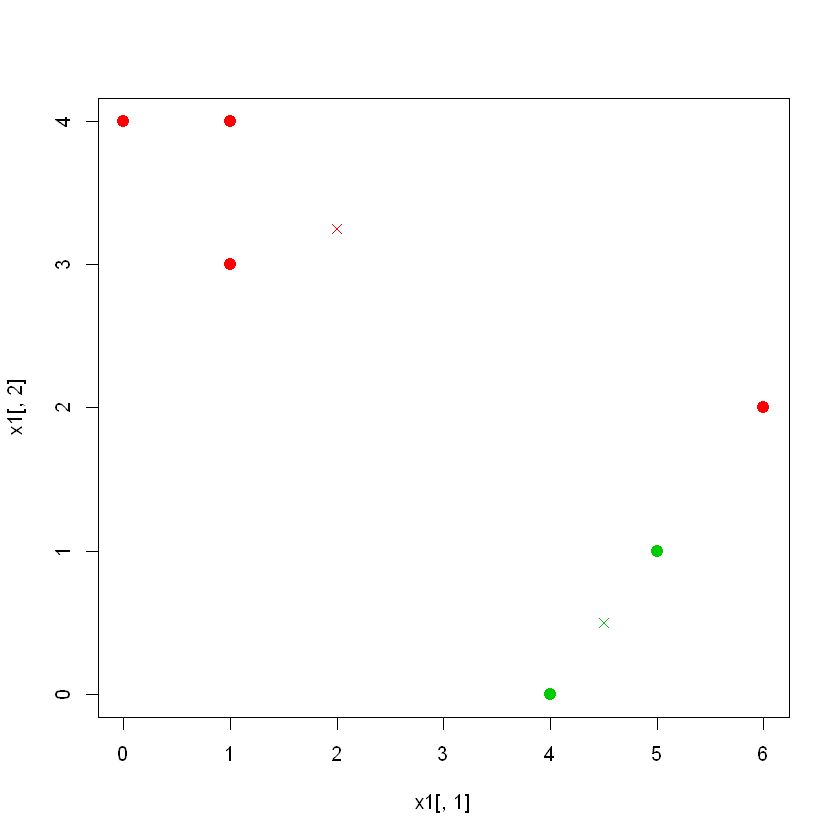

In [18]:
#get centroids for each cluster
#C)
cen1 <- c(mean(x1[s == 1, 1]), mean(x1[s == 1, 2]))
cen2 <- c(mean(x1[s == 2, 1]), mean(x1[s == 2, 2]))
plot(x1[,1], x1[,2], col=(s + 1), pch = 20, cex = 2)
points(cen1[1], cen1[2], col = 2, pch = 4)
points(cen2[1], cen2[2], col = 3, pch = 4)

In [ ]:
#D

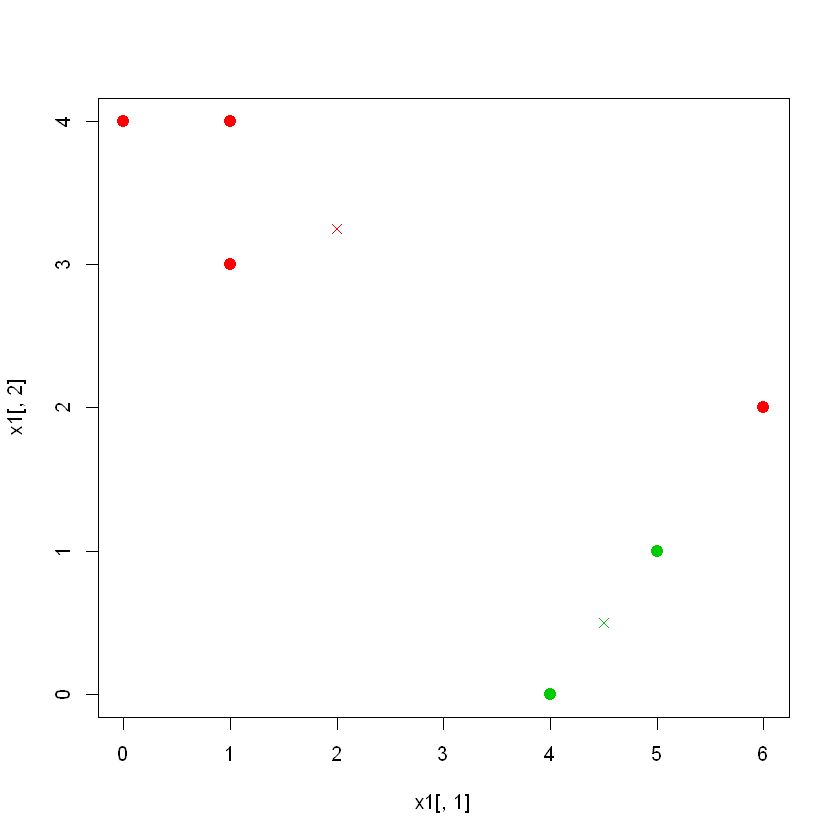

In [19]:
#E
cen1 <- c(mean(x1[s == 1, 1]), mean(x1[s == 1, 2]))
cen2 <- c(mean(x1[s == 2, 1]), mean(x1[s == 2, 2]))
plot(x1[,1], x1[,2], col=(s + 1), pch = 20, cex = 2)
points(cen1[1], cen1[2], col = 2, pch = 4)
points(cen2[1], cen2[2], col = 3, pch = 4)

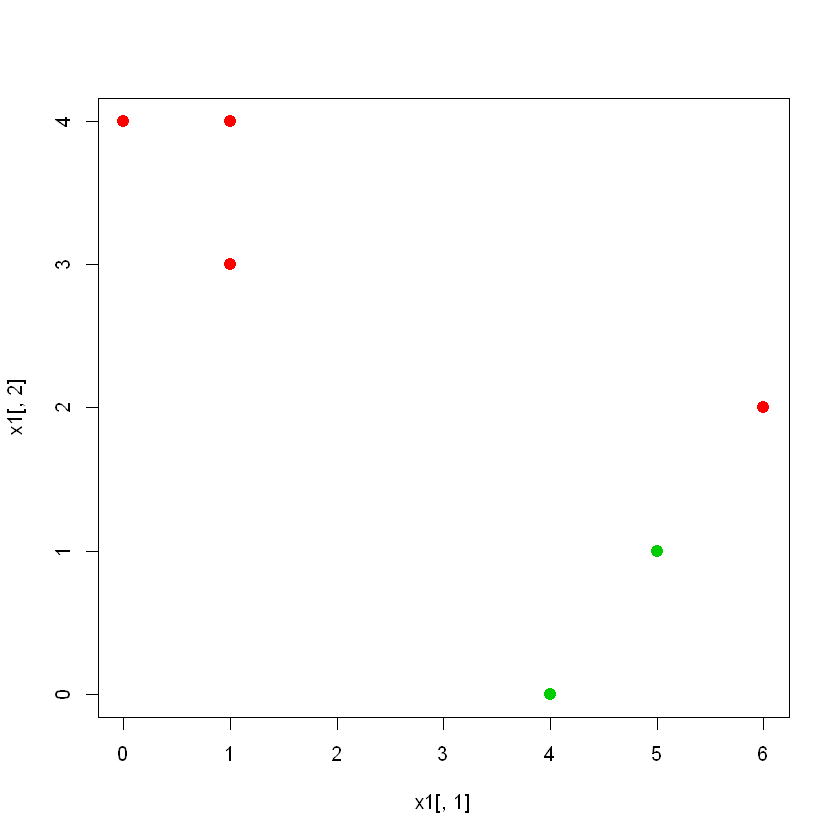

In [22]:
#F
#Color observations according to cluster labels
plot(x1[, 1], x1[, 2], col=(s + 1), pch = 20, cex = 2)


In [ ]:
#Exercise 4, Chapter 10

#A)
#Some of the clusters might link like (123) and (45) but it is not certain 
#that the other clusters would meet or link eventually

#B)
#Both would be met or link at the same height

In [23]:
#Exercise 8, Chapter 10

#A)
#calculate PVE in 2 ways
out <- prcomp(USArrests, scale = TRUE)
var <- out$sdev^2
pve <- var / sum(var)
sum(var)

[1] 4

In [24]:
#Display PVE
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [25]:
#B)
#what is the use of prcomp() function?
l <- out$rotation
USArrests1 <- scale(USArrests)
var <- sum(apply(as.matrix(USArrests1)^2, 2, sum))
apply((as.matrix(USArrests1) %*% l)^2, 2, sum) / var

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

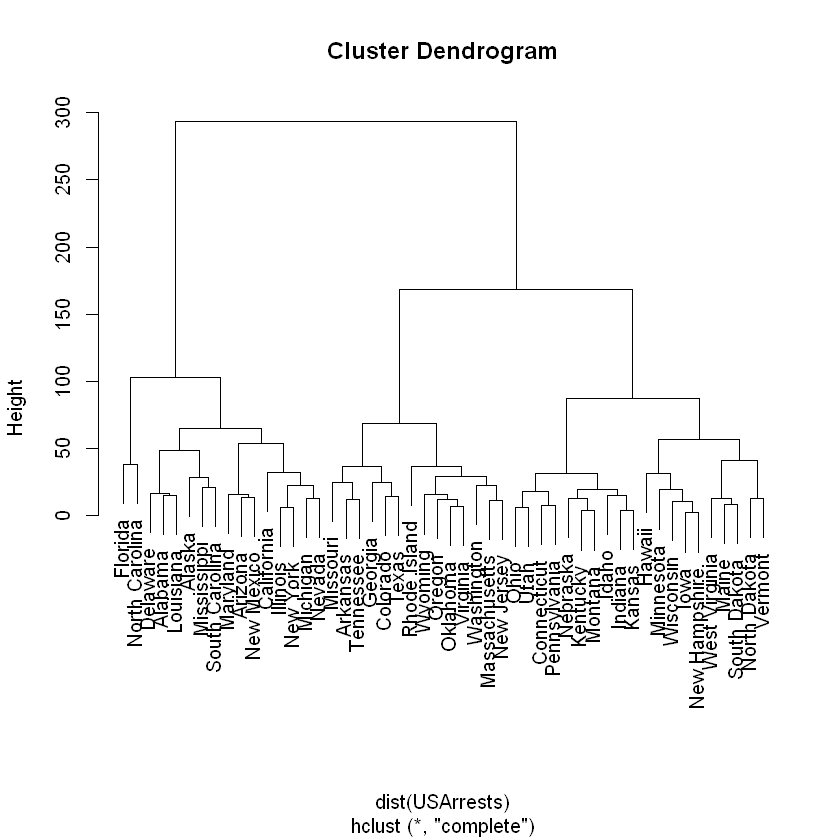

In [26]:
#Exercise 9, Chapter 10
#A)

set.seed(123)
h <- hclust(dist(USArrests), method = "complete")
plot(h)

In [27]:
#B)
#cut dendogram at height/ in 3 different clusters
cutree(h, 3)


Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

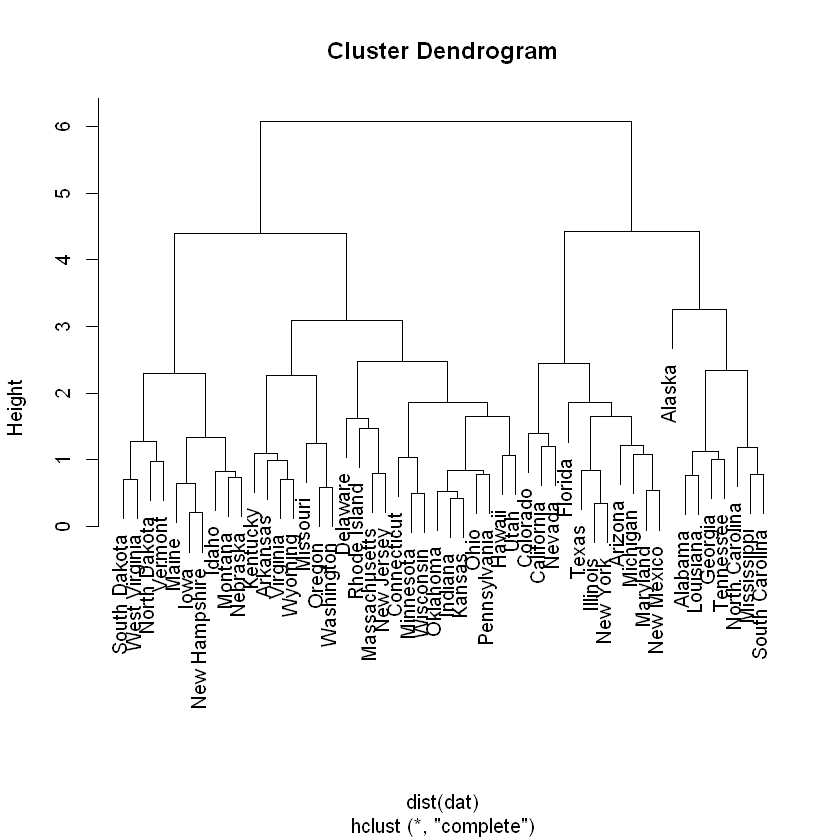

In [30]:
#C)
#Hierarchical Clustering

dat <- scale(USArrests)
h_sd <- hclust(dist(dat), method = "complete")
plot(h_sd)

In [31]:
#D)
#effects on scaling the variable
cutree(h_sd, 3)

#Scaling the variables can lead to some potential changes in the clusters since the variables have different units and the data might variate, therefore defining 
#the variables should be the firsts tep in this process.

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [38]:
#Exercise 10, Chapter 10
#A)
#generate simulated data set with 20 observations

set.seed(123)
dataset <- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
dataset[1:20, 2] <- 1
dataset[21:40, 2] <- 2
true.s <- c(rep(1, 20), rep(2, 20), rep(3, 20))



In [46]:
#B)
p_out <- prcomp(dataset)


In [41]:
#C)
out <- kmeans(dataset, 3, nstart = 15)
table(true.s, out$cluster)

      
true.s  1  2  3
     1  0  0 20
     2  0 20  0
     3 20  0  0

In [42]:
#D)
out <- kmeans(dataset, 2, nstart = 15)
table(true.s, out$cluster)

      
true.s  1  2
     1  0 20
     2  0 20
     3 20  0

In [43]:
#E)
out <- kmeans(dataset, 4, nstart = 15)
table(true.s, out$cluster)

      
true.s  1  2  3  4
     1  0  0 20  0
     2 20  0  0  0
     3  0 12  0  8

In [48]:
#F)
out <- kmeans(p_out$dataset[, 1:2], 3, nstart = 15)
table(true.s, out$cluster)

ERROR: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x), : 'data' must be of a vector type, was 'NULL'


In [49]:
#G)
out <- kmeans(scale(dataset), 3, nstart = 15)
table(true.s, out$cluster)

      
true.s 1 2 3
     1 6 7 7
     2 6 6 8
     3 8 4 8